# II. Data Modelisation for Project 5 ML
**(Automatic categorization of questions)**

## Contents

1) <a href='#Sec.1'>Divide the data into train and test</a>
1) <a href='#Sec.2'>Supervised learning for predicting the tags</a>
    1) <a href='#Sec.2.1'>Transforming the target using MultiLabelBinarizer</a>
    1) <a href='#Sec.2.2'>Transforming the data using Bag of Words - Count Vectorizer</a>
        1) <a href='#Sec.2.2.1'>CountVectorizer the X data</a>
        1) <a href='#Sec.2.2.2'>Fit/predict using RandomForestClassifier</a>
        1) <a href='#Sec.2.2.3'>Fit/predict using KNeighborsClassifier</a>
        1) <a href='#Sec.2.2.4'>Fit/predict using One vs Rest Classifier (Logistic Regression, SGDClassifier, and MultinomialNB)</a>
    1) <a href='#Sec.2.3'>Transforming the data using TF-IDF Vectorizer</a>
        1) <a href='#Sec.2.3.1'>TfidfVectorizer the X data</a>
        1) <a href='#Sec.2.3.2'>Fit/predict using RandomForestClassifier</a>
        1) <a href='#Sec.2.3.3'>Fit/predict using KNeighborsClassifier</a>
        1) <a href='#Sec.2.3.4'>Fit/predict using One vs Rest Classifier (Logistic Regression, SGDClassifier, and MultinomialNB)</a>
    1) <a href='#Sec.2.4'>Words Embedding using Word2Vec</a>
        1) <a href='#Sec.2.4.1'>Build and train Word2Vec model on our own vocabulary from the data</a>
        1) <a href='#Sec.2.4.2'>Generating the embeddings</a>
        1) <a href='#Sec.2.4.3'>Fit/predict using RandomForestClassifier</a>
        1) <a href='#Sec.2.4.4'>Fit/predict using KNeighborsClassifier</a>
        1) <a href='#Sec.2.4.5'>Fit/predict using One vs Rest Classifier (Logistic Regression, SGDClassifier, and MultinomialNB)</a>
    1) <a href='#Sec.2.5'>Words Embedding using Bidirectional Encoder Representations from Transformers (BERT)</a>
        1) <a href='#Sec.2.5.1'>Features creation</a>
        1) <a href='#Sec.2.5.2'>Fit/predict using RandomForestClassifier</a>
        1) <a href='#Sec.2.5.3'>Fit/predict using KNeighborsClassifier</a>
        1) <a href='#Sec.2.5.4'>Fit/predict using One vs Rest Classifier (Logistic Regression, SGDClassifier, and MultinomialNB)</a>
    1) <a href='#Sec.2.6'>Words Embedding using Universal Sentence Encoder (USE)</a>
        1) <a href='#Sec.2.6.1'>Features creation</a>
        1) <a href='#Sec.2.6.2'>Fit/predict using RandomForestClassifier</a>
        1) <a href='#Sec.2.6.3'>Fit/predict using KNeighborsClassifier</a>
        1) <a href='#Sec.2.6.4'>Fit/predict using One vs Rest Classifier (Logistic Regression, SGDClassifier, and MultinomialNB)</a>
    1) <a href='#Sec.2.7'>Conclusion on the supervised learning</a>
1) <a href='#Sec.3'>Unsupervised learning for predicting the tags</a>
    1) <a href='#Sec.3.1'>Preparing the data for the modelisation</a>
    1) <a href='#Sec.3.2'>LDA (Latent Dirichlet Allocation)</a>
        1) <a href='#Sec.3.2.1'>Choosing the optimal number of topics</a>
        1) <a href='#Sec.3.2.2'>Generating topics</a>
        1) <a href='#Sec.3.2.3'>Generating words/question matrix</a>
        1) <a href='#Sec.3.2.4'>Comparing top 5 words/question with initial tags</a>
        1) <a href='#Sec.3.2.5'>Dimension reduction using t-SNE and visualisation</a>
    1) <a href='#Sec.3.3'>NMF (Non-Negative Matrix factorization)</a>
        1) <a href='#Sec.3.3.1'>Choosing the optimal number of topics</a>
        1) <a href='#Sec.3.3.2'>Generating topics</a>
        1) <a href='#Sec.3.3.3'>Generating words/question matrix</a>
        1) <a href='#Sec.3.3.4'>Comparing top 5 words/question with initial tags</a>
        1) <a href='#Sec.3.3.5'>Dimension reduction using t-SNE and visualisation</a>
    1) <a href='#Sec.3.4'>Conclusion on the unsupervised learning</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import *
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.cluster import adjusted_rand_score

from itertools import combinations
from collections import Counter

import multiprocessing

import gensim
from gensim.models import Word2Vec, LdaMulticore, KeyedVectors, Nmf, TfidfModel, CoherenceModel
from gensim import corpora
import gensim.downloader as api
from string import punctuation
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import tensorflow_hub as hub
import tensorflow_text

# Bert
import os
import transformers
from transformers import *

import joblib

import time

sns.set()

<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning) 

In [3]:
# Function to add infos about the type and null values to .describe function
def df_description(df):
    # General description
    description = df.describe(include='all', datetime_is_numeric=True)

    # Types and content of the columns
    description_type = pd.DataFrame(df.dtypes, columns=['type']).T
    number_null = (df.shape[0] - description.loc['count'].T)
    percent_null = (df.shape[0] - description.loc['count'].T)*100/df.shape[0]
    description_null = pd.DataFrame([number_null, percent_null],
                                    index=['number null', 'percentage null'])

    # Concatenate general, type and null stats
    description = pd.concat([description_type, description_null, description])
    return description

In [4]:
# Loading the data
SO_questions_df = pd.read_csv('data/SO_questions_cleaned_30_bitri.csv', sep='\t')

In [5]:
# Removing null value if any
SO_questions_df = SO_questions_df.dropna(axis=0)

In [6]:
df_description(SO_questions_df)

,Tags_30,Title_filt_lem_bitri,Title_filt_stem_bitri,Body_filt_lem_bitri,Body_filt_stem_bitri,Title_Body_filt_lem_bitri,Title_Body_filt_stem_bitri
type,object,object,object,object,object,object,object
number null,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,114462,114462,114462,114462,114462,114462,114462
unique,103964,113007,112913,114461,114461,114462,114462
top,javascript jquery html css twitter-bootstrap,difference,differ,error code,error code,cursor turn wait cursor display cursor user le...,cursor turn wait cursor display cursor user le...
freq,162,59,59,2,2,1,1


In [7]:
# Function that store different metrics in pandas dataframe
def metrics_score(model, df, ytest, ypred):
    if(df is None):
        temp_df = pd.DataFrame(index=['Accuracy', 'Jaccard', 'hamming_loss',
                                      'F1', 'Recall', 'Precision'],
                               columns=[model])
    else:
        temp_df = df
        
    scores = []
    scores.append(accuracy_score(ytest, ypred))
    scores.append(jaccard_score(ytest, ypred, average='samples'))
    scores.append(hamming_loss(ytest, ypred))
    scores.append(f1_score(ytest, ypred, average='samples'))
    scores.append(recall_score(ytest, ypred, average='samples'))
    scores.append(precision_score(ytest, ypred, average='samples'))
    temp_df[model] = scores
    
    return temp_df

In [8]:
# Function that will plot jaccard score for top 20 and worst 20 tags
def jaccard_score_tag(ytest, ypred, mlb_classes):
    # Generating jaccard score for each tag
    jac_score_tag = jaccard_score(ytest, ypred, average=None)
    jac_tag=pd.DataFrame()
    i = 0
    for tag in mlb_classes:
        jac_tag.loc[i,'tag']= tag
        jac_tag.loc[i,'jaccard_score']= jac_score_tag[i]
        i += 1
    jac_tag = jac_tag.sort_values('jaccard_score', ascending=False)
    
    # Plotting jaccard score for each top 20 and worst 20 tags
    fig, axes = plt.subplots(1, 2, figsize=(14, 3))
    sns.barplot(data=jac_tag.iloc[:20], x='tag',
                y='jaccard_score', ax=axes[0])
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40,
                            horizontalalignment='right')
    axes[0].set_title('Jaccard score for the top 20 tags',
                      fontsize=15, fontweight='bold')
    sns.barplot(data=jac_tag.iloc[-20:], x='tag',
                y='jaccard_score', ax=axes[1])
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40,
                            horizontalalignment='right')
    axes[1].set_title('Jaccard score for the worst 20 tags',
                      fontsize=15, fontweight='bold')
    plt.show()

In [9]:
#import numpy as np

from bs4 import BeautifulSoup

import re

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import spacy

#import time

# Load the stop_words
stop_w = joblib.load('data/stop_w.pkl')


# Function that take the title and body of a question and perform
# filtering, tokenization, and lemmatization
def filter_tokenize_lem(question_title, question_body):
    
    # Creating a varaible containing both the title and body
    question_title_body = question_title + ' ' + question_body
    
    # lower case the texts
    question_title_body = ' '.join([x.lower().replace('\n', ' ') for x in question_title_body.split()])

    # Function that will be used for removing the a href links and code tags
    def href_code_removing(x):
        BS = BeautifulSoup(x, 'lxml')
        for link in BS.find_all(['a', 'code', 'blockquote']):
            link.decompose()
        return BS.get_text()

    question_title_body_filt = ' '.join([href_code_removing(x) for x in question_title_body.split()])


    # Removing the links without a href in body and title
    question_title_body_filt = re.sub(r'http\S+', '', question_title_body_filt, flags=re.MULTILINE)
    # Remove English contractions
    question_title_body_filt = re.sub("\'\w+", '', question_title_body_filt, flags=re.MULTILINE)
    # Remove adverbs (ly)
    question_title_body_filt = re.sub(r"\w+ly\b", '', question_title_body_filt, flags=re.MULTILINE)
    # Remove string of pure float numbers and remove . at the end of string
    question_title_body_filt = re.sub("((?<=[a-zA-Z:])+\.+?)|((?<=[\s])+?(\d*\.*)*)", ' ',
                                      question_title_body_filt, flags=re.MULTILINE)


    def start_end_char_clean(texts):
        # Removing all folder link like c:\ or c:/ etc
        c = set(word for x in texts for word in x
                if ((word.startswith("a:") or word.startswith("b:")
                     or word.startswith("c:") or word.startswith("d:")
                     or word.startswith("e:") or word.startswith("f:")
                     or word.startswith("g:") or word.startswith("h:")
                     or word.startswith("file:")
                     or word.startswith(":\\") or word.startswith(":/")
                     or word.startswith("\\") or word.endswith("\\")
                     or word.startswith("/") or word.endswith("/")
                     or word.startswith("./") or word.endswith("/.")
                     or word.startswith("<") or word.endswith(">")
                     or word.startswith("[") or word.endswith("]")
                     or word.startswith("{") or word.endswith("}")
                     or word.startswith("-") or word.endswith("-")
                     or word.startswith("+") or word.startswith("$"))))
        texts = ' '.join(y for y in texts.split() if y not in c)
        return texts

    question_title_body_filt = start_end_char_clean(question_title_body_filt)


    def tokenizer_fct(sentence) :
        sentence_clean = sentence.replace('---', '').replace('--', '')\
                                 .replace('- ', ' ').replace(' -', ' ')\
                                 .replace('...', '').replace('..', '')\
                                 .replace('. ', ' ')\
                                 .replace('_ ', ' ').replace(' _', ' ')\
                                 .replace(' &', ' ').replace('& ', ' ')\
                                 .replace('^', ' ')\
                                 .replace('?', '').replace('!', '')\
                                 .replace(';', ' ').replace(',', ' ')\
                                 .replace("'", ' ').replace('"', ' ')\
                                 .replace("’", ' ').replace('=', ' ')\
                                 .replace(')', ' ').replace('(', ' ')\
                                 .replace('|', ' ')\
                                 .replace('% ', ' ').replace(' %', ' ')\
                                 .replace(' #', ' ').replace('@', ' ')\
                                 .replace('*', ' ')\
                                 .replace('`', ' ').replace('~', ' ')
        tokenizer = RegexpTokenizer(r'\S+')
        word_tokens = tokenizer.tokenize(sentence_clean)
        return word_tokens


    # Stop word filtering
    def stop_word_filter_fct(list_words) :
        word_tokens = tokenizer_fct(list_words)
        # Removing all digits and stop words
        filtered_w = [w for w in word_tokens if (not w.isdigit() and not w in stop_w)]
        return filtered_w


    # Adjective and adverbe filtering
    def adj_adv_word_filter_fct(list_words) :
        word_tokens = stop_word_filter_fct(list_words)
        # Tags of adjective and adverbs
        adj_adv_tags = ['JJR', 'JJS', 'RB', 'RBR', 'RBS', 'WRB']
        # Tagging the words
        tags = dict(pos_tag(word_tokens))
        # Selecting the words tagged adjective and adverbs and not in tags list
        adj_adv_words = [word for word,pos in tags.items() if (pos in adj_adv_tags)]
        # Removing those words
        filtered_w = ' '.join([w for w in word_tokens if not w in adj_adv_words])
        return filtered_w


    # Lemmatizer
    def lem_fct(list_words) :
        list_words = adj_adv_word_filter_fct(list_words)
        lemmatizer = WordNetLemmatizer()
        lem_w = [lemmatizer.lemmatize(w) for w in list_words.split()]
        final_w = ' '.join(lem_w)
        return final_w

    question_title_body_filt_lem = lem_fct(question_title_body_filt)

    question_title_body_filt_lem = start_end_char_clean(question_title_body_filt_lem)


    def final_clean(sentence):
        sentence = sentence.replace(':', '')\
                           .replace('<','').replace('>','')\
                           .replace('[','').replace(']','')\
                           .replace('{','').replace('}','')
        sentence = ' '.join([w for w in sentence.split(' ') if ((len(w) >= 2 and not w.isdigit()))])
        return sentence

    question_title_body_filt_lem = final_clean(question_title_body_filt_lem)

    # Remove the left over string of pure float numbers
    question_title_body_filt_lem = re.sub("((?<=[\s])+?(\d*\.*)*)", '',
                                          question_title_body_filt_lem,
                                          flags=re.MULTILINE)
    
    print('Text after filtering, tokenizing, and lemmatization:\n{}\n'.format(question_title_body_filt_lem))
    
    return question_title_body_filt_lem

## <font id='Sec.1'> 1. Divide the data into train and test

In [10]:
# Creating a database with columns are not null
columns_list_target = 'Tags_30'
columns_list_data = 'Title_Body_filt_lem_bitri'
columns_list = [columns_list_data] + [columns_list_target]

data = SO_questions_df[(SO_questions_df[columns_list].notna()).all(axis=1)].reset_index(drop = True)
data = data[columns_list]

# Selecting 100% of the data
sample_index = np.random.randint(data.shape[0], size=int(data.shape[0]*1))
sample_data = data[columns_list_data].iloc[sample_index].reset_index(drop=True)
sample_target = data[columns_list_target].iloc[sample_index].reset_index(drop=True)

# Divide the data into 80% training and 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(sample_data, sample_target, train_size=0.8, random_state=42)

## <font id='Sec.2'> 2. Supervised learning for predicting the tags

### <font id='Sec.2.1'> A. Transforming the target using MultiLabelBinarizer

In [11]:
# Function that generate a df containing all the words and their frequency
def words_freq_fct(df, freq_min):
    words = Counter(word for x in df.str.split() for word in set(x))
    words_df = pd.DataFrame()
    words_df[['Word', 'Frequency']] = words.keys(), words.values()
    words_df.sort_values('Frequency', ascending=False, inplace=True)
    print('Number of unique words = {}, while {} words appeared only in {} questions or less.'
          .format(words_df.shape[0],
                  words_df[words_df['Frequency'] <= freq_min].shape[0],
                  freq_min))
    words_df = words_df.reset_index(drop=True)
    return words_df

In [12]:
# Creating a dataframe with the words and frequency of tags
Tag_words_df = words_freq_fct(ytrain, 29)

# Storing in a list the top 250 tags
top_tags = list(Tag_words_df.loc[:250, 'Word'])

Number of unique words = 2594, while 416 words appeared only in 29 questions or less.


Number of questions with no top_tags = 496
Size of ytrain after removing the questions with no top_Tags = 91073


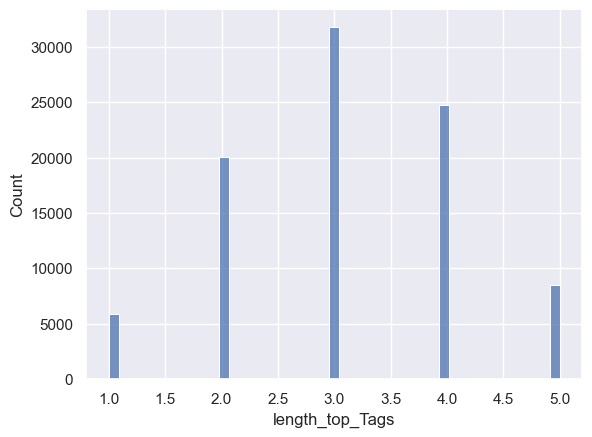

In [13]:
# Creating dataframe of ytrain
ytrain_df = pd.DataFrame(ytrain, columns=['Tags_30'])

# Create new column with the top tags for each questions in ytrain
ytrain_df['top_Tags'] = [' '.join(y for y in x if y in top_tags) for x in ytrain_df['Tags_30'].str.split(' ')]

# Creating a columns indicating the length of top_Tags
ytrain_df['length_top_Tags'] = ytrain_df['top_Tags'].apply(lambda x: len(x.split(' ')))

# Correcting the 'length_top_Tags' with 0 when the 'top_Tags' == ''
index_for_0 = ytrain_df[ytrain_df['top_Tags'] == ''].index
ytrain_df.loc[index_for_0, 'length_top_Tags'] = ytrain_df.loc[index_for_0, 'length_top_Tags'].replace(1, 0)
print('Number of questions with no top_tags =', ytrain_df[ytrain_df['length_top_Tags'] == 0].shape[0])

# Dropping the questions with no tags from the top_Tags
xtrain.drop(index_for_0, inplace=True)
ytrain_df.drop(index_for_0, inplace=True)
ytrain = ytrain_df['top_Tags']
print('Size of ytrain after removing the questions with no top_Tags =', len(ytrain))

sns.histplot(data=ytrain_df, x='length_top_Tags')
plt.show()

In [14]:
# Transforming the target
ytrain = ytrain.apply(lambda x: [(str(y)) for y in x.split()])
ytest = ytest.apply(lambda x: [(str(y)) for y in x.split()])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=top_tags)

# Fit and transform the _Tags column
ytrain_mlb = mlb.fit_transform(ytrain)
print('The number of questions (rows) and unique words (columns) in ytrain_vect = {} and {} respectively'
      .format(ytrain_mlb.shape[0], ytrain_mlb.shape[1]))

ytest_mlb = mlb.transform(ytest)
print('The number of questions (rows) and unique words (columns) in ytest_vect = {} and {} respectively'
      .format(ytest_mlb.shape[0], ytest_mlb.shape[1]))

The number of questions (rows) and unique words (columns) in ytrain_vect = 91073 and 251 respectively
The number of questions (rows) and unique words (columns) in ytest_vect = 22893 and 251 respectively


In [15]:
mlb.classes_

array(['c#', 'java', 'javascript', 'python', 'c++', 'ios', '.net', 'html',
       'android', 'jquery', 'php', 'objective-c', 'css', 'iphone',
       'spring', 'node.js', 'asp.net', 'c', 'sql', 'json', 'linux',
       'asp.net-mvc', 'xcode', 'mysql', 'performance', 'arrays', 'swift',
       'ruby-on-rails', 'multithreading', 'reactjs', 'c++11',
       'unit-testing', 'sql-server', 'python-3.x', 'ajax', 'windows',
       'spring-boot', 'pandas', 'hibernate', 'database', 'string',
       'django', 'ruby', 'wpf', 'visual-studio', 'numpy',
       'entity-framework', 'rest', 'angularjs', 'typescript', 'angular',
       'gcc', 'macos', 'jpa', 'asp.net-core', 'image', 'google-chrome',
       'firebase', 'spring-mvc', 'algorithm', 'amazon-web-services',
       'postgresql', 'authentication', 'http', 'xml', 'laravel',
       'asynchronous', 'cocoa-touch', 'templates', 'eclipse', 'testing',
       'security', 'maven', 'linq', 'dataframe', 'debugging', 'selenium',
       'ipad', 'list', 'bash', 't

In [16]:
# Save the MultiLabelBinarizer
joblib.dump(mlb, 'data/mlb.pkl')

['data/mlb.pkl']

### <font id='Sec.2.2'> B. Transforming the data using Bag of Words - Count Vectorizer
    
Count the number of times each word appears in each document without considering its position or grammatical role.
The bag-of-words approach results in a document-term matrix that is, for the most part, filled with zeros called a sparse matrix. After all, most words are only present in a small set of documents.

#### <font id='Sec.2.2.1'> a) CountVectorizer the X data

In [17]:
# token_pattern=r"\S+" to just tokenize words separated by space
cv_x = CountVectorizer(max_features=2500, token_pattern=r"\S+")
xtrain_CV = cv_x.fit_transform(xtrain)
print('The number of questions (rows) and unique words (columns) in xtrain_vect = {} and {} respectively'
      .format(xtrain_CV.shape[0], xtrain_CV.shape[1]))
xtest_CV = cv_x.transform(xtest)
print('The number of questions (rows) and unique words (columns) in xtest_vect = {} and {} respectively'
      .format(xtest_CV.shape[0], xtest_CV.shape[1]))

The number of questions (rows) and unique words (columns) in xtrain_vect = 91073 and 2500 respectively
The number of questions (rows) and unique words (columns) in xtest_vect = 22893 and 2500 respectively


In [18]:
cv_x.get_feature_names_out()

array(['.net', 'aar', 'ability', ..., 'zip', 'zone', 'zoom'], dtype=object)

In [19]:
# Save the trained model to a file
joblib.dump(cv_x, 'data/BOW_vectors.pkl')

['data/BOW_vectors.pkl']

#### <font id='Sec.2.2.2'> b) Fit/predict using RandomForestClassifier

In [20]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_CV, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_CV)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('CV_RFC', None, ytest_mlb, ypred_mlb)
print('accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 167.29s

accuracy score = 0.5686017559952824, jaccard score = 0.6800770874024707, and hamming loss = 0.004268950494270679
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.92      0.82      0.86      3359
                 java       0.93      0.83      0.88      3076
           javascript       0.92      0.79      0.85      3191
               python       0.95      0.87      0.91      2370
                  c++       0.96      0.83      0.89      1895
                  ios       0.91      0.83      0.87      1739
                 .net       0.94      0.63      0.76      1574
                 html       0.92      0.68      0.78      1512
              android       0.97      0.84      0.90      1368
               jquery       0.95      0.75      0.84      1313
                  php       0.95      0.80      0.87      1091
          objective-c       0.93      0.62      0.75       922
                  css

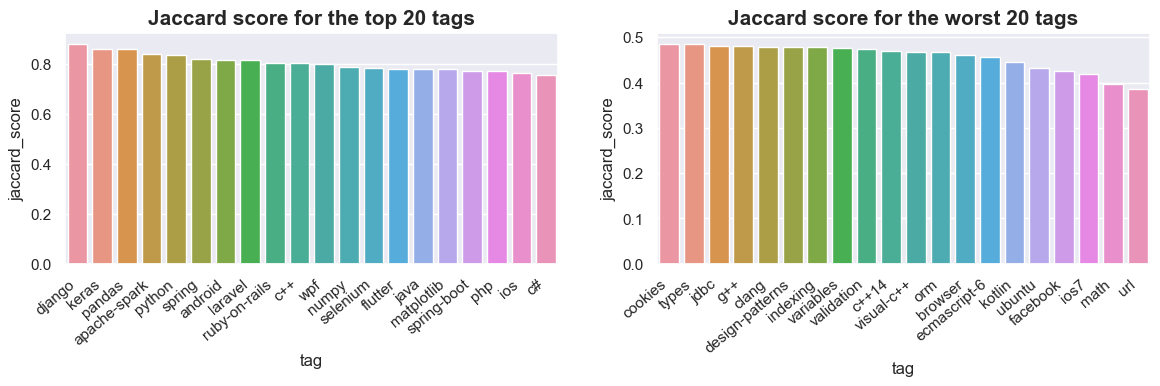

In [21]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

#### <font id='Sec.2.2.3'> c) Fit/predict using KNeighborsClassifier

In [22]:
# Function that fit and calcultae error rate for different k_neighbors. It genrate a plot for the different k_neighbors
def knn_score(xtrain, ytrain, xtest, ytest, k_range):
    error = []

    for k in k_range:    
        classifier = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
        classifier.fit(xtrain, ytrain)
        ypred = classifier.predict(xtest)
        error.append(jaccard_score(ytest, ypred, average='samples'))
    
    plt.figure(figsize = (10, 3))
    # Plot the error rates.
    # The models with uniform weights are plotted with a solid blue line.
    # The models with distance weights are plotted with a dashed green line.
    # The circular markers mark the distinct K-values.
    plt.plot(k_range, error, c='blue', linestyle='dashed', 
             marker='o', markerfacecolor='blue', label='Error distance')
    
    plt.xlabel('K-value')
    plt.ylabel('Error rate')
    plt.show()

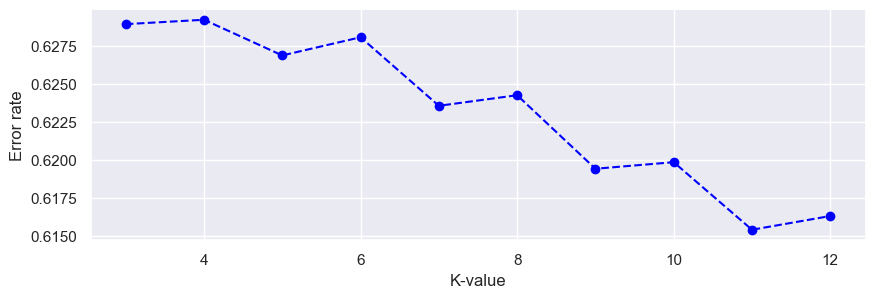

In [23]:
knn_score(xtrain_CV, ytrain_mlb, xtest_CV, ytest_mlb, range(3, 13, 1))

In [24]:
# Initialize KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_CV, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_CV)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('CV_KNN', metrics_score_df, ytest_mlb, ypred_mlb)
print('Test: accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report on test set:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 47.36s

Test: accuracy score = 0.555366269165247, jaccard score = 0.6292281240748021, and hamming loss = 0.006528553152958428
Classifier report on test set:
                        precision    recall  f1-score   support

                   c#       0.81      0.69      0.74      3359
                 java       0.80      0.72      0.76      3076
           javascript       0.81      0.69      0.74      3191
               python       0.82      0.72      0.77      2370
                  c++       0.83      0.73      0.77      1895
                  ios       0.77      0.72      0.74      1739
                 .net       0.74      0.63      0.68      1574
                 html       0.77      0.66      0.71      1512
              android       0.80      0.70      0.75      1368
               jquery       0.82      0.68      0.74      1313
                  php       0.76      0.62      0.68      1091
          objective-c       0.66      0.62      0.64       922
     

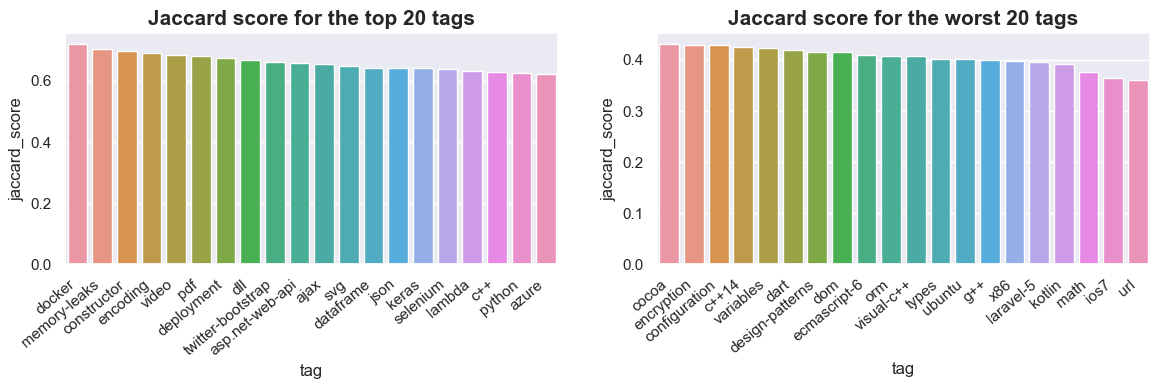

In [25]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

In [26]:
# Save the trained model to a file
joblib.dump(clf, 'data/BOW_bitri_KNN.pkl')

['data/BOW_bitri_KNN.pkl']

In [27]:
# Load the mlb
mlb_BOW = joblib.load('data/mlb.pkl')
# Load the saved KNeighborsClassifier model
BOW_vectors = joblib.load('data/BOW_vectors.pkl')
# Load the saved KNeighborsClassifier model
BOW_KNN = joblib.load('data/BOW_bitri_KNN.pkl')

# Assuming you have an input text
question_title = "How to do feature extraction from a question in python using neural-network?"
question_body = "I would like to extract features using neural-network in python.\
I've applied many supervised and unsupervised machine-learning models, e.g, TF-IDF with KNN and TF-IDF with NMF.\
The end goal is to compare the neural-network results with the other already applied machine-learning models."

# Preprocess the input text (lemmatization)
question_title_body_filt_lem = filter_tokenize_lem(question_title, question_body)

start = time.time()

# Vectorize the lemmatized text using the trained TfidfVectorizer
x_input_BOW = BOW_vectors.transform([question_title_body_filt_lem])

# Make a prediction using the loaded OneVsRestClassifier model
y_input_mlb = BOW_KNN.predict(x_input_BOW.toarray())

# Convert the binary prediction back to tags using the trained MultiLabelBinarizer
y_input = mlb_BOW.inverse_transform(y_input_mlb)

stop = time.time()
print('CV_KNN processing time: {}s\n'.format(np.around((stop-start), 2)))

# Print the predicted tags
print('Predicted tags:', y_input)

Text after filtering, tokenizing, and lemmatization:
feature extraction python neural-network extract feature neural-network python applied supervised unsupervised machine-learning model tf-idf knn tf-idf nmf end goal compare neural-network result applied machine-learning model

CV_KNN processing time: 0.06s

Predicted tags: [('python', 'pandas', 'matplotlib')]


#### <font id='Sec.2.2.4'> d) Fit/predict using One vs the rest classifier (logistic regression, SGDClassifier, and MultinomialNB)

In [28]:
# Initialize LogisticRegression
clf = OneVsRestClassifier(LogisticRegression(random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_CV, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_CV)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 483.28s

Accuracy score = 0.22067881011662954, jaccard score = 0.5341655525401647, and hamming loss = 0.007031499216082857
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.80      0.64      0.71      3359
                 java       0.80      0.65      0.72      3076
           javascript       0.75      0.59      0.66      3191
               python       0.87      0.76      0.81      2370
                  c++       0.85      0.72      0.78      1895
                  ios       0.79      0.65      0.71      1739
                 .net       0.59      0.32      0.41      1574
                 html       0.72      0.51      0.60      1512
              android       0.90      0.73      0.80      1368
               jquery       0.82      0.62      0.71      1313
                  php       0.88      0.70      0.78      1091
          objective-c       0.63      0.43      0.51       922
                  cs

In [29]:
# Initialize ovr SGDClassifier
clf = OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='elasticnet', l1_ratio=0.8,
                                        fit_intercept=False, random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_CV, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_CV)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 146.36s

Accuracy score = 0.12392434368584283, jaccard score = 0.47075517470539324, and hamming loss = 0.008155557562699013
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.74      0.75      0.74      3359
                 java       0.82      0.65      0.72      3076
           javascript       0.74      0.63      0.68      3191
               python       0.88      0.76      0.81      2370
                  c++       0.84      0.71      0.77      1895
                  ios       0.79      0.70      0.74      1739
                 .net       0.62      0.30      0.41      1574
                 html       0.69      0.54      0.61      1512
              android       0.88      0.76      0.81      1368
               jquery       0.80      0.60      0.69      1313
                  php       0.86      0.72      0.79      1091
          objective-c       0.62      0.42      0.50       922
                  c

In [30]:
# train and evaluate the model
# 1. Declare the model
clf = OneVsRestClassifier(MultinomialNB(force_alpha=True), n_jobs=-1)

start = time.time()

# 2. Train the model
clf.fit(xtrain_CV, ytrain_mlb)

# 3. Make predictions  on test set
ypred_mlb = clf.predict(xtest_CV)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# 4. score
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 4.58s

Accuracy score = 0.002708251430568296, jaccard score = 0.20566825607852723, and hamming loss = 0.05174288213850578
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.63      0.84      0.72      3359
                 java       0.61      0.81      0.69      3076
           javascript       0.50      0.83      0.62      3191
               python       0.52      0.87      0.65      2370
                  c++       0.46      0.91      0.61      1895
                  ios       0.48      0.83      0.61      1739
                 .net       0.34      0.75      0.47      1574
                 html       0.35      0.83      0.49      1512
              android       0.48      0.84      0.61      1368
               jquery       0.36      0.91      0.51      1313
                  php       0.36      0.89      0.51      1091
          objective-c       0.34      0.78      0.47       922
                  css

### <font id='Sec.2.3'> C. Transforming the data using TF-IDF Vectorizer

(Term Frequency - Inverse Document Frequency)
    
This is another method which is based on the frequency method but it is different to the count vectorization in the sense that it takes into account not just the occurrence of a word in a single document but in the entire corpus. TF-IDF works by penalising common words occurring in almost all documents by assigning them lower weights while giving importance to words that appear in a subset of documents.
    
TF = (Number of times term t appears in a document)/(Number of terms in the document)
    
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
If a word has appeared in all the document, then probably that word is not relevant to a particular document. But if it has appeared in a subset of documents then probably the word is of some relevance to the documents it is present in.

#### <font id='Sec.2.3.1'> a) TfidfVectorizer the X data

In [31]:
tfidf_x = TfidfVectorizer(max_features=2500, token_pattern=r"\S+")
xtrain_tfidf = tfidf_x.fit_transform(xtrain)
print('The number of questions (rows) and unique words (columns) in xtrain_vect = {} and {} respectively'
      .format(xtrain_tfidf.shape[0], xtrain_tfidf.shape[1]))
xtest_tfidf = tfidf_x.transform(xtest)
print('The number of questions (rows) and unique words (columns) in xtest_vect = {} and {} respectively'
      .format(xtest_tfidf.shape[0], xtest_tfidf.shape[1]))

The number of questions (rows) and unique words (columns) in xtrain_vect = 91073 and 2500 respectively
The number of questions (rows) and unique words (columns) in xtest_vect = 22893 and 2500 respectively


In [32]:
tfidf_x.get_feature_names_out()

array(['.net', 'aar', 'ability', ..., 'zip', 'zone', 'zoom'], dtype=object)

In [33]:
# Save the trained model to a file
joblib.dump(tfidf_x, 'data/TFIDF_vectors.pkl')

['data/TFIDF_vectors.pkl']

#### <font id='Sec.2.3.2'> b) Fit/predict using RandomForestClassifier

In [34]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_tfidf, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_tfidf)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('tfidf_RFC', metrics_score_df, ytest_mlb, ypred_mlb)
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 221.4s

Accuracy score = 0.5689948892674617, jaccard score = 0.681393875857249, and hamming loss = 0.004251895575867151
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.91      0.82      0.87      3359
                 java       0.93      0.84      0.88      3076
           javascript       0.92      0.79      0.85      3191
               python       0.95      0.88      0.91      2370
                  c++       0.97      0.83      0.89      1895
                  ios       0.91      0.83      0.87      1739
                 .net       0.95      0.63      0.76      1574
                 html       0.92      0.68      0.78      1512
              android       0.97      0.85      0.90      1368
               jquery       0.95      0.74      0.83      1313
                  php       0.95      0.80      0.87      1091
          objective-c       0.94      0.61      0.74       922
                  css  

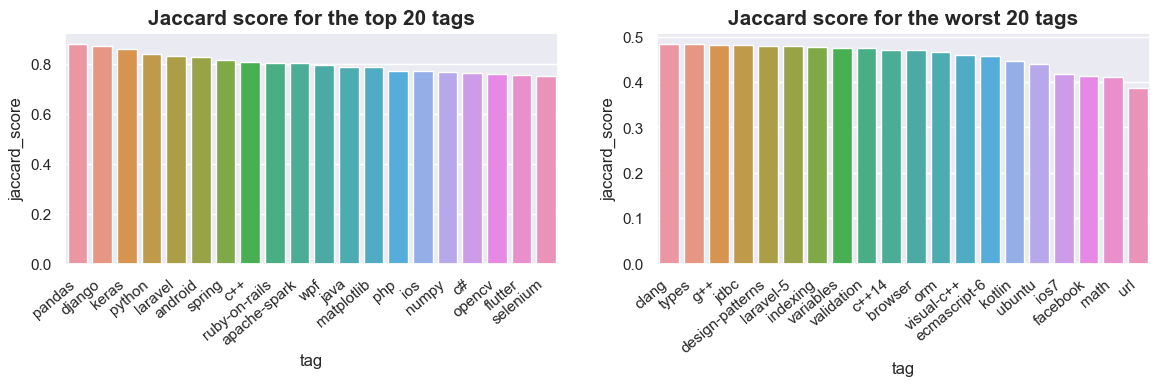

In [35]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

#### <font id='Sec.2.3.3'> c) Fit/predict using KNeighborsClassifier

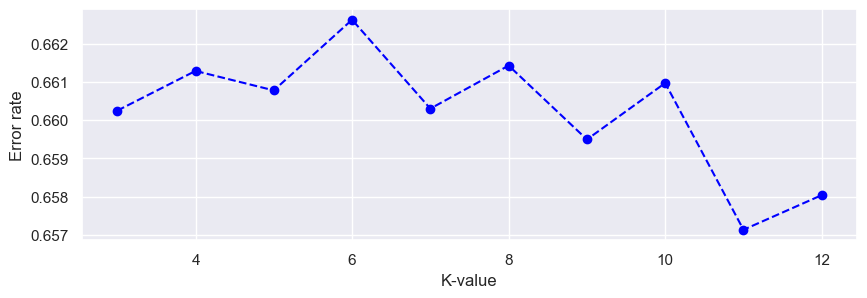

In [36]:
knn_score(xtrain_tfidf, ytrain_mlb, xtest_tfidf, ytest_mlb, range(3, 13, 1))

In [37]:
# Initialize KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6, weights='distance', n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_tfidf, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_tfidf)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('tfidf_KNN', metrics_score_df, ytest_mlb, ypred_mlb)
print('Test: Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 189.26s

Test: Accuracy score = 0.562530031013847, jaccard score = 0.6626237901791564, and hamming loss = 0.005419461367390265
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.83      0.73      0.78      3359
                 java       0.85      0.76      0.80      3076
           javascript       0.83      0.74      0.78      3191
               python       0.88      0.76      0.81      2370
                  c++       0.87      0.78      0.82      1895
                  ios       0.83      0.75      0.79      1739
                 .net       0.79      0.64      0.71      1574
                 html       0.80      0.69      0.74      1512
              android       0.86      0.72      0.78      1368
               jquery       0.84      0.71      0.77      1313
                  php       0.86      0.65      0.74      1091
          objective-c       0.77      0.66      0.71       922
                

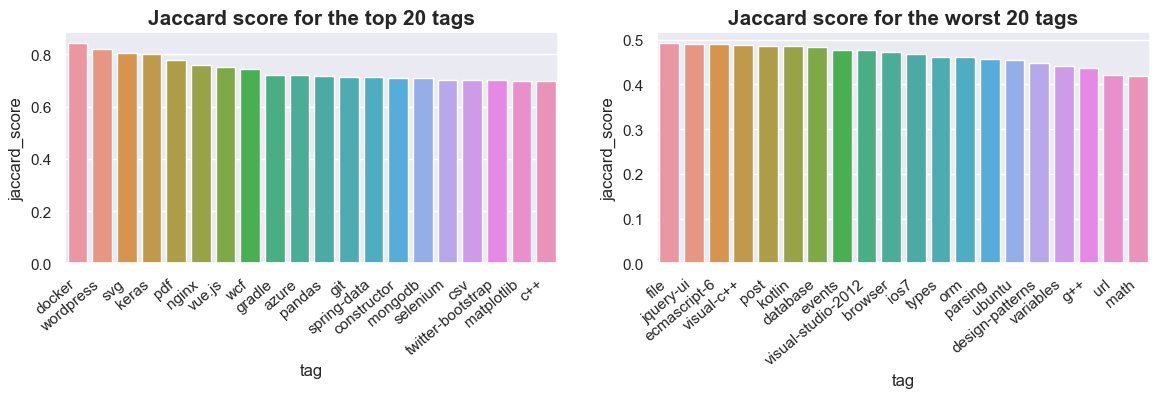

In [38]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

In [39]:
# Save the trained model to a file
joblib.dump(clf, 'data/TFIDF_bitri_KNN.pkl')

['data/TFIDF_bitri_KNN.pkl']

In [40]:
# Load the mlb
mlb_TFIDF = joblib.load('data/mlb.pkl')
# Load the saved KNeighborsClassifier model
TFIDF_vectors = joblib.load('data/TFIDF_vectors.pkl')
# Load the saved KNeighborsClassifier model
TFIDF_KNN = joblib.load('data/TFIDF_bitri_KNN.pkl')


# Assuming you have an input text
question_title = "How to do feature extraction from a question in python using neural-network?"
question_body = "I would like to extract features using neural-network in python.\
I've applied many supervised and unsupervised machine-learning models, e.g, TF-IDF with KNN and TF-IDF with NMF.\
The end goal is to compare the neural-network results with the other already applied machine-learning models."

# Preprocess the input text (lemmatization)
question_title_body_filt_lem = filter_tokenize_lem(question_title, question_body)

start = time.time()

# Vectorize the lemmatized text using the trained TfidfVectorizer
x_input_TFIDF = TFIDF_vectors.transform([question_title_body_filt_lem])

# Make a prediction using the loaded OneVsRestClassifier model
y_input_mlb = TFIDF_KNN.predict(x_input_TFIDF.toarray())

# Convert the binary prediction back to tags using the trained MultiLabelBinarizer
y_input = mlb_TFIDF.inverse_transform(y_input_mlb)

stop = time.time()
print('TFIDF_KNN processing time: {}s\n'.format(np.around((stop-start), 2)))

# Print the predicted tags
print('Predicted tags:', y_input)

Text after filtering, tokenizing, and lemmatization:
feature extraction python neural-network extract feature neural-network python applied supervised unsupervised machine-learning model tf-idf knn tf-idf nmf end goal compare neural-network result applied machine-learning model

TFIDF_KNN processing time: 0.08s

Predicted tags: [('python', 'machine-learning', 'keras', 'tensorflow')]


#### <font id='Sec.2.3.4'> d) Fit/predict using One vs the rest classifier (logistic regression, SGDClassifier, and MultinomialNB)

In [41]:
# Initialize LogisticRegression
clf = OneVsRestClassifier(LogisticRegression(random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_tfidf, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_tfidf)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 387.29s

Accuracy score = 0.10505394662123793, jaccard score = 0.40590713942502693, and hamming loss = 0.008218730372703917
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.82      0.60      0.70      3359
                 java       0.84      0.63      0.72      3076
           javascript       0.77      0.57      0.65      3191
               python       0.88      0.70      0.78      2370
                  c++       0.89      0.67      0.76      1895
                  ios       0.81      0.59      0.69      1739
                 .net       0.63      0.24      0.35      1574
                 html       0.73      0.47      0.57      1512
              android       0.92      0.66      0.77      1368
               jquery       0.85      0.53      0.65      1313
                  php       0.90      0.61      0.73      1091
          objective-c       0.61      0.30      0.40       922
                  c

In [42]:
# Initialize SGDClassifier
clf = OneVsRestClassifier(SGDClassifier(loss='perceptron', penalty='l2',
                                        fit_intercept=False,
                                        random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_tfidf, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_tfidf)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 34.03s

Accuracy score = 0.10225833224129646, jaccard score = 0.45625434760268335, and hamming loss = 0.011143996938468117
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.65      0.67      0.66      3359
                 java       0.64      0.62      0.63      3076
           javascript       0.58      0.61      0.59      3191
               python       0.67      0.80      0.73      2370
                  c++       0.72      0.74      0.73      1895
                  ios       0.65      0.61      0.63      1739
                 .net       0.43      0.38      0.40      1574
                 html       0.56      0.56      0.56      1512
              android       0.75      0.76      0.75      1368
               jquery       0.64      0.60      0.62      1313
                  php       0.66      0.68      0.67      1091
          objective-c       0.44      0.59      0.51       922
                  cs

In [43]:
# train and evaluate the model
# 1. Declare the model
clf = OneVsRestClassifier(MultinomialNB(), n_jobs=-1)

start = time.time()

# 2. Train the model
clf.fit(xtrain_tfidf, ytrain_mlb)

# 3. Make predictions  on test set
ypred_mlb = clf.predict(xtest_tfidf)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# 4. score
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 4.22s

Accuracy score = 0.032455335692132964, jaccard score = 0.18155518530305584, and hamming loss = 0.010710488757415192
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.78      0.29      0.43      3359
                 java       0.81      0.41      0.54      3076
           javascript       0.70      0.38      0.49      3191
               python       0.84      0.45      0.59      2370
                  c++       0.78      0.57      0.66      1895
                  ios       0.75      0.44      0.56      1739
                 .net       0.64      0.03      0.07      1574
                 html       0.64      0.38      0.48      1512
              android       0.92      0.34      0.49      1368
               jquery       0.76      0.37      0.50      1313
                  php       0.92      0.20      0.33      1091
          objective-c       0.50      0.20      0.29       922
                  cs

### <font id='Sec.2.4'> D. Words Embedding using Word2Vec
    
Text vectorization approach using Count Vector and TF-IDF is simple and efficient method, but it has several shortcomings like:
- Context and meaning are lost.
- The document-term matrix is large and sparse.
- Vectorization is relative to the corpus (similar words will have different vectors on another corpus).

To overcome these shortcomings, we will use different approach like Word2Vec, BERT, and USE.

We will start with Word2Vec:
    
Word2vec is trained to predict words based on context via the use of a neural network to predict target words in sentences and via taking the coefficient of the last layer of the neural network as the elements of the word vector.

#### <font id='Sec.2.4.1'> a) Build and train Word2Vec model on our own vocabulary from the data

In [44]:
# Initialising some parameter that will be used by Word2Vec
w2v_size = 300
w2v_window = 5
w2v_min_count = 20
w2v_epochs = 50
maxlen = int(xtrain.apply(lambda x: len(x.split())).median()*2)

# Convert xtrain into a list of tokens
Body_Title_train = xtrain.to_list()
Body_Title_test = xtest.to_list()
Body_Title_train = [text.split() for text in Body_Title_train]
Body_Title_test = [text.split() for text in Body_Title_test]

In [45]:
# Creation and training of Word2Vec model
print('Build & train Word2Vec model ...')

# Initiating some parameters for word2vec
w2v_model = Word2Vec(min_count=w2v_min_count,# Ignores all words with total absolute frequency lower than - (2, 100)
                     window=w2v_window,# Maximum distance between the current and predicted word within a sentence - (2, 10)
                     vector_size=w2v_size,# Dimensionality of the word vectors - (50, 300)
                     sample=6e-5,# The threshold for configuring which higher-frequency words are randomly downsampled - (0, 1e-5)
                     alpha=0.03,# The initial learning rate - (0.01, 0.05)
                     min_alpha=0.0007,# Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
                     seed=42,
                     sg=0,# 0 for CBOW and 1 for skipgrams
                     negative=20,# If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)
                     workers=multiprocessing.cpu_count()-1)# Use these many worker threads to train the model

# Building the vocabulary table (digesting all the words and filtering out the unique words, and counting on them)
w2v_model.build_vocab(Body_Title_train)

# Training of the model
w2v_model.train(Body_Title_train,
                total_examples=w2v_model.corpus_count,# Count of sentences
                epochs=w2v_epochs)# Number of iterations (epochs) over the corpus - [10, 20, 30]

# Counting the number of words
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print('Vocabulary size: %i' % len(w2v_words))
print('Word2Vec trained')

Build & train Word2Vec model ...
Vocabulary size: 7021
Word2Vec trained


In [46]:
print(model_vectors.similarity('python', 'java'))
print(model_vectors.similarity('c++', 'c'))
print(model_vectors.similarity('c++', 'python'))
print(model_vectors.similarity('sun', 'earth'))
print(model_vectors.similarity('dog', 'cat'), '\n')
print(model_vectors.most_similar('python'), '\n')
print(model_vectors.most_similar('c++'), '\n')
print(model_vectors.most_similar('earth'))

0.2470458
0.6273819
0.36814246
0.06259976
0.36573642 

[('numpy', 0.5176185369491577), ('cython', 0.44558730721473694), ('program', 0.4388813376426697), ('ironpython', 0.4379231333732605), ('panda', 0.4368782341480255), ('python3', 0.43049901723861694), ('pygame', 0.42124348878860474), ('ipython', 0.42077669501304626), ('pip', 0.4125567376613617), ('pyinstaller', 0.4100395143032074)] 

[('c', 0.6273819804191589), ('compiler', 0.5946074724197388), ('c/c++', 0.5345925092697144), ('program', 0.5345044136047363), ('gcc', 0.5256314873695374), ('c#', 0.5181176066398621), ('compile', 0.5173583626747131), ('c++11', 0.5165663957595825), ('library', 0.4795280694961548), ('standard', 0.44536471366882324)] 

[('matplotlib', 0.26613909006118774), ('yielded', 0.21508437395095825), ('hell', 0.20489363372325897), ('y-axis', 0.20342253148555756), ('figure', 0.19946976006031036), ('cpp', 0.19912013411521912), ('populates', 0.19402290880680084), ('gemfile', 0.19337908923625946), ('pie_chart', 0.193278834

In [47]:
# Preparation of sentences (tokenization)

print('Fit Tokenizer ...')
tokenizer_train = Tokenizer()
tokenizer_train.fit_on_texts(Body_Title_train)
x_sentences_train = pad_sequences(tokenizer_train.texts_to_sequences(Body_Title_train),
                                  maxlen=maxlen, padding='post')
x_sentences_test = pad_sequences(tokenizer_train.texts_to_sequences(Body_Title_test),
                                 maxlen=maxlen, padding='post')
                                                   
num_words = len(tokenizer_train.word_index) + 1
print('Number of unique words: %i' % num_words)

Fit Tokenizer ...
Number of unique words: 7372


In [48]:
# Save the tokenizer model to a file
joblib.dump(tokenizer_train, 'data/tokenizer.pkl')

['data/tokenizer.pkl']

#### <font id='Sec.2.4.2'> b) Generating the embeddings

In [49]:
# Création de la matrice d'embedding

print('Create Embedding matrix ...')
word_index = tokenizer_train.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0
    
for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i, 4)
print('Word embedding rate : ', word_rate)
print('Embedding matrix: %s' % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.9525
Embedding matrix: (7372, 300)


In [50]:
# Création du modèle

input = Input(shape=(len(x_sentences_train), maxlen), dtype='float64')
word_input = Input(shape=(maxlen,), dtype='float64')  
word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=w2v_size,
                           weights=[embedding_matrix],
                           input_length=maxlen)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input], word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 74)]              0         
                                                                 
 embedding (Embedding)       (None, 74, 300)           2211600   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 2,211,600
Trainable params: 2,211,600
Non-trainable params: 0
_________________________________________________________________


In [51]:
xtrain_emb = embed_model.predict(x_sentences_train)
print(xtrain_emb.shape)
xtest_emb = embed_model.predict(x_sentences_test)
print(xtest_emb.shape)

2847/2847 [==============================] - 4s 1ms/step
(91073, 300)
716/716 [==============================] - 1s 1ms/step
(22893, 300)


#### <font id='Sec.2.4.3'> c) Fit/predict using RandomForestClassifier

In [52]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_emb, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_emb)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('W2V_RFC', metrics_score_df, ytest_mlb, ypred_mlb)
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 318.48s

Accuracy score = 0.5454068929367055, jaccard score = 0.5749778992538789, and hamming loss = 0.005347413038624343
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.96      0.62      0.75      3359
                 java       0.96      0.66      0.78      3076
           javascript       0.95      0.64      0.76      3191
               python       0.97      0.65      0.78      2370
                  c++       0.95      0.72      0.82      1895
                  ios       0.95      0.66      0.78      1739
                 .net       1.00      0.56      0.71      1574
                 html       0.95      0.60      0.74      1512
              android       0.99      0.60      0.75      1368
               jquery       0.98      0.60      0.74      1313
                  php       1.00      0.52      0.68      1091
          objective-c       0.99      0.54      0.70       922
                  css

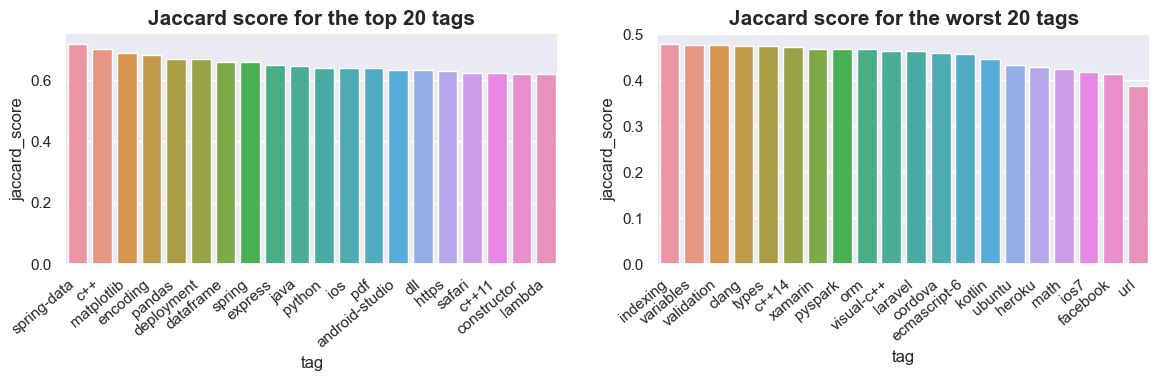

In [53]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

#### <font id='Sec.2.4.4'> d) Fit/predict using KNeighborsClassifier

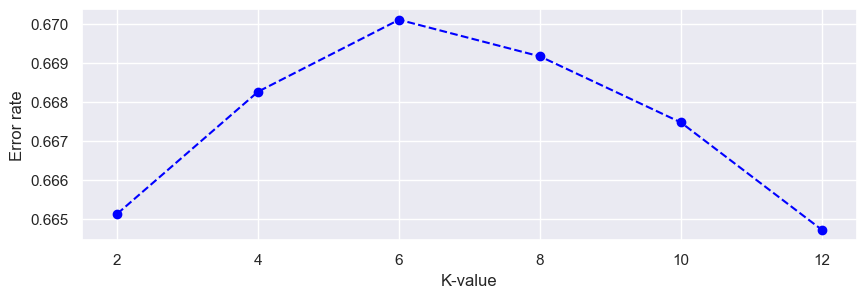

In [54]:
knn_score(xtrain_emb, ytrain_mlb, xtest_emb, ytest_mlb, range(2, 13, 2))

In [55]:
# Initialize KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6, weights='distance', n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_emb, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_emb)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('W2V_KNN', metrics_score_df, ytest_mlb, ypred_mlb)
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 13.16s

Accuracy score = 0.5626173939632202, jaccard score = 0.6701019719759073, and hamming loss = 0.005407453312595945
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.84      0.77      0.80      3359
                 java       0.86      0.77      0.81      3076
           javascript       0.82      0.76      0.79      3191
               python       0.87      0.78      0.82      2370
                  c++       0.86      0.83      0.84      1895
                  ios       0.84      0.80      0.82      1739
                 .net       0.80      0.64      0.71      1574
                 html       0.77      0.75      0.76      1512
              android       0.88      0.74      0.80      1368
               jquery       0.79      0.76      0.77      1313
                  php       0.87      0.68      0.77      1091
          objective-c       0.79      0.66      0.72       922
                  css 

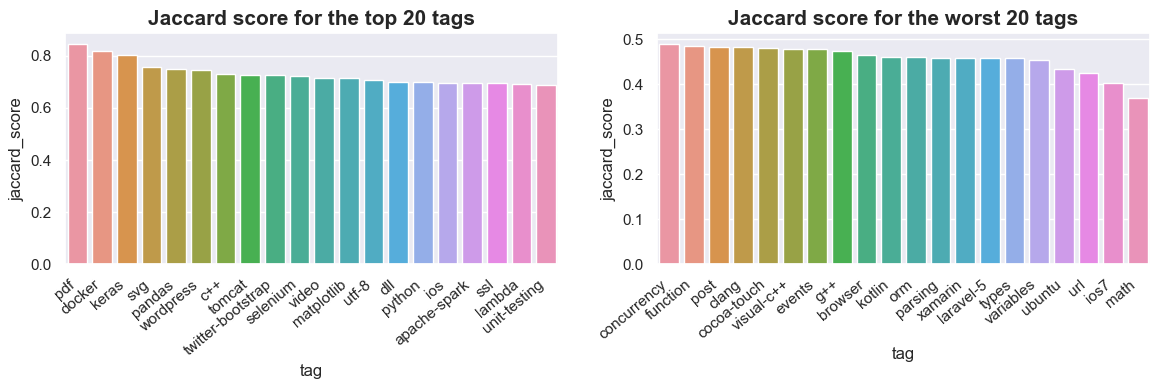

In [56]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

In [57]:
# Save the trained model to a file
joblib.dump(clf, 'data/W2V_bitri_KNN.pkl')

['data/W2V_bitri_KNN.pkl']

In [58]:
# Load the mlb
mlb_W2V = joblib.load('data/mlb.pkl')
# Save the tokenizer model to a file
tokenizer_W2V = joblib.load('data/tokenizer.pkl')
# Load the saved KNeighborsClassifier model
W2V_KNN = joblib.load('data/W2V_bitri_KNN.pkl')

# Assuming you have an input text
question_title = "How to do feature extraction from a question in python using neural-network?"
question_body = "I would like to extract features using neural-network in python.\
I've applied many supervised and unsupervised machine-learning models, e.g, Word2Vec with KNN and TF-IDF with NMF.\
The end goal is to compare the neural-network results with the other already applied machine-learning models."

# Preprocess the input text (lemmatization)
question_title_body_filt_lem = filter_tokenize_lem(question_title, question_body)

start = time.time()

# Vectorize the lemmatized text using the trained TfidfVectorizer
x_input_W2V = pad_sequences(tokenizer_W2V.texts_to_sequences([question_title_body_filt_lem]),
                            maxlen=maxlen, padding='post')
x_input_W2V = embed_model.predict(x_input_W2V)

# Make a prediction using the loaded OneVsRestClassifier model
y_input_mlb = W2V_KNN.predict(x_input_W2V)

# Convert the binary prediction back to tags using the trained MultiLabelBinarizer
y_input = mlb_W2V.inverse_transform(y_input_mlb)

stop = time.time()
print('W2V_KNN processing time: {}s\n'.format(np.around((stop - start), 2)))

# Print the predicted tags
print('Predicted tags:', y_input)

Text after filtering, tokenizing, and lemmatization:
feature extraction python neural-network extract feature neural-network python applied supervised unsupervised machine-learning model word2vec knn tf-idf nmf end goal compare neural-network result applied machine-learning model

1/1 [==============================] - 0s 142ms/step
W2V_KNN processing time: 0.5s

Predicted tags: [('python', 'machine-learning', 'deep-learning', 'neural-network')]


#### <font id='Sec.2.4.5'> e) Fit/predict using One vs the rest classifier (logistic regression, SGDClassifier, and MultinomialNB)

In [59]:
# Initialize LogisticRegression
clf = OneVsRestClassifier(LogisticRegression(random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_emb, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_emb)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 886.49s

Accuracy score = 0.08033023194863059, jaccard score = 0.3562682038569865, and hamming loss = 0.009148223425696158
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.76      0.53      0.63      3359
                 java       0.79      0.57      0.66      3076
           javascript       0.71      0.50      0.59      3191
               python       0.85      0.68      0.75      2370
                  c++       0.82      0.62      0.70      1895
                  ios       0.79      0.59      0.67      1739
                 .net       0.49      0.16      0.24      1574
                 html       0.68      0.40      0.50      1512
              android       0.86      0.62      0.72      1368
               jquery       0.77      0.46      0.58      1313
                  php       0.85      0.55      0.67      1091
          objective-c       0.58      0.25      0.35       922
                  cs

In [60]:
# Initialize ovr SGDClassifier
clf = OneVsRestClassifier(SGDClassifier(fit_intercept=False, random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(xtrain_emb, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(xtest_emb)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 113.18s

Accuracy score = 0.07565631415716595, jaccard score = 0.35425955707732926, and hamming loss = 0.009236978613306352
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.74      0.61      0.67      3359
                 java       0.78      0.63      0.70      3076
           javascript       0.68      0.59      0.63      3191
               python       0.83      0.71      0.77      2370
                  c++       0.79      0.68      0.73      1895
                  ios       0.76      0.69      0.72      1739
                 .net       0.57      0.18      0.27      1574
                 html       0.69      0.42      0.52      1512
              android       0.86      0.66      0.75      1368
               jquery       0.77      0.52      0.62      1313
                  php       0.81      0.61      0.70      1091
          objective-c       0.57      0.27      0.36       922
                  c

In [61]:
# train and evaluate the model
# 1. Declare the model
clf = OneVsRestClassifier(MultinomialNB(), n_jobs=-1)

start = time.time()

# 2. Train the model
clf.fit(xtrain_tfidf, ytrain_mlb)

# 3. Make predictions  on test set
ypred_mlb = clf.predict(xtest_tfidf)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# 4. score
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 4.89s

Accuracy score = 0.032455335692132964, jaccard score = 0.18155518530305584, and hamming loss = 0.010710488757415192
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.78      0.29      0.43      3359
                 java       0.81      0.41      0.54      3076
           javascript       0.70      0.38      0.49      3191
               python       0.84      0.45      0.59      2370
                  c++       0.78      0.57      0.66      1895
                  ios       0.75      0.44      0.56      1739
                 .net       0.64      0.03      0.07      1574
                 html       0.64      0.38      0.48      1512
              android       0.92      0.34      0.49      1368
               jquery       0.76      0.37      0.50      1313
                  php       0.92      0.20      0.33      1091
          objective-c       0.50      0.20      0.29       922
                  cs

### <font id='Sec.2.5'> E. Words Embedding using Bidirectional Encoder Representations from Transformers (BERT)
BERT provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture.
    
BERT generates context aware embeddings that allow for multiple representations (each representation, in this case, is a vector) of each word based on a given word's context.

However, Word2Vec generates embeddings that are independent from context, so each word is represented as a single vector as opposed to multiple. Different senses of the word (if any) are combined into one single vector.

In [62]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    """Fonction qui tokenise des phrases en amont de la production de features par plongement de mots de type BERT

    Arguments de cette fonction :
    sentences -- le corpus surlequel va être effectué le plongement de mots, sous forme d`une liste de longues chaînes de carctères (pas des tokens)
    bert_tokenizer -- un modèle pour la tokenisation
    max_length -- nombre maximal de mots par chaînes de caractères"""
    
    input_ids = []
    token_type_ids = []
    attention_mask = []
    bert_inp_tot = []
    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens=True,
                                              max_length=max_length,
                                              padding='max_length',
                                              return_attention_mask=True,
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors='tf')
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    return input_ids, token_type_ids, attention_mask


# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    """Fonction qui génère des features par plongement de mots de type BERT

    Arguments de cette fonction :
    model -- module python correspondant à modèle pré-entraîné qui va être utilisé 
    model_type -- chaîne de caractère, nom du modèle pré-entraîné
    sentences -- le corpus surlequel va être effectué le plongement de mots, sous forme d`une liste de longues chaînes de carctères (pas des tokens)
    max_length -- nombre maximal de mots par chaînes de caractères
    b_size -- taille du batch
    mode -- chaîne de caractère, soit HF soit TFhub, pour utilser HuggingFace ou Tensorflow Hub"""
    
    batch_size, batch_size_pred = b_size, b_size
    bert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()
    for step in range(len(sentences)//batch_size):
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask = bert_inp_fct(sentences[idx:idx+batch_size],
                                                                 bert_tokenizer,
                                                                 max_length)
        # Bert HuggingFace
        if mode == 'HF':    
            outputs = model.predict([input_ids, attention_mask, token_type_ids],
                                    batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state
            last_hidden_states_mean = last_hidden_states.mean(axis=1)
        # Bert Tensorflow Hub
        if mode == 'TFhub': 
            text_preprocessed = {"input_word_ids": input_ids, 
                                 "input_mask": attention_mask, 
                                 "input_type_ids": token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
            last_hidden_states_mean = np.array(last_hidden_states).mean(axis=1)
        # Initialisation si on est au 1er pas du batch
        if step == 0:
            features_bert = last_hidden_states_mean
            #last_hidden_states_tot_0 = last_hidden_states
        # Sinon, accumulation.
        else:
            features_bert = np.concatenate((features_bert, last_hidden_states_mean))

    # Si le nombre de documents n'est pas divisible par la taille du batch,
    if (len(sentences)//batch_size)*batch_size != len(sentences):
        # on re-applique bert_inp_fct sur les derniers documents restants
        input_ids, token_type_ids, attention_mask = bert_inp_fct(sentences[idx+batch_size:],
                                                                 bert_tokenizer,
                                                                 max_length)
        # Bert HuggingFace
        if mode == 'HF':    
            outputs = model.predict([input_ids, attention_mask, token_type_ids],
                                    batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state
            last_hidden_states_mean = last_hidden_states.mean(axis=1)
        # Bert Tensorflow Hub
        if mode == 'TFhub': 
            text_preprocessed = {"input_word_ids": input_ids,
                                 "input_mask": attention_mask,
                                 "input_type_ids": token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
            last_hidden_states_mean = np.array(last_hidden_states).mean(axis=1)
        # Ajout final
        features_bert = np.concatenate((features_bert, last_hidden_states_mean))
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
    return features_bert

#### <font id='Sec.2.5.1'> a) Features creation

In [63]:
max_length = int(xtrain.apply(lambda x: len(x.split())).median()*2)
batch_size = 50

model_type = 'bert-base-uncased'

# For BERT HuggingFace
model = TFAutoModel.from_pretrained(model_type)

# For BERT hub Tensorflow
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
#model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
#bert_layer = hub.KerasLayer(model_url, trainable=True)
#model = bert_layer

loading configuration file config.json from cache at C:\Users\DJANGO/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at C:\Users\DJANGO/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb

In [64]:
# Création des features
features_bert_train = feature_BERT_fct(model, model_type, xtrain,
                                       max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\DJANGO/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\DJANGO/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab

1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step
temps traitement :  5706.0


In [65]:
features_bert_test = feature_BERT_fct(model, model_type, xtest,
                                      max_length, batch_size, mode='HF')

loading configuration file config.json from cache at C:\Users\DJANGO/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\DJANGO/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab

1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step
temps traitement :  1392.0


In [66]:
X_train = features_bert_train
X_test = features_bert_test

#### <font id='Sec.2.5.2'> b) Fit/predict using RandomForestClassifier

In [67]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(X_train, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(X_test)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('BERT_RFC', metrics_score_df,
                                 ytest_mlb, ypred_mlb)
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 565.98s

Accuracy score = 0.5394225309046433, jaccard score = 0.5411836223590909, and hamming loss = 0.005676851411459826
Classifier report:
                        precision    recall  f1-score   support

                   c#       1.00      0.56      0.71      3359
                 java       1.00      0.55      0.71      3076
           javascript       1.00      0.54      0.70      3191
               python       1.00      0.56      0.71      2370
                  c++       0.99      0.60      0.75      1895
                  ios       0.99      0.55      0.71      1739
                 .net       1.00      0.55      0.71      1574
                 html       1.00      0.54      0.70      1512
              android       1.00      0.54      0.70      1368
               jquery       1.00      0.53      0.69      1313
                  php       1.00      0.50      0.67      1091
          objective-c       1.00      0.53      0.70       922
                  css

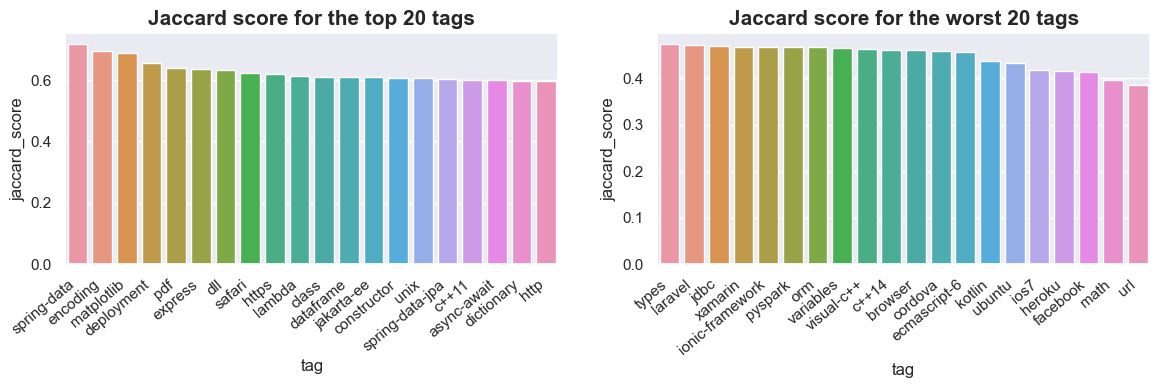

In [68]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

#### <font id='Sec.2.5.3'> c) Fit/predict using KNeighborsClassifier

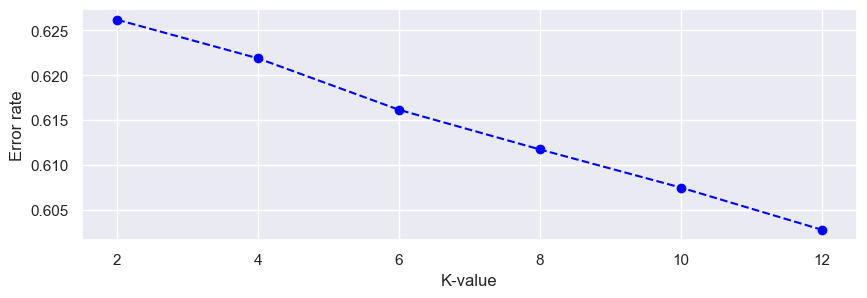

In [69]:
knn_score(X_train, ytrain_mlb, X_test, ytest_mlb, range(2, 13, 2))

In [70]:
# Initialize KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(X_train, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(X_test)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('BERT_KNN', metrics_score_df,
                                 ytest_mlb, ypred_mlb)
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 28.54s

Accuracy score = 0.5536190101777836, jaccard score = 0.6218866895613062, and hamming loss = 0.0069561443215040075
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.75      0.70      0.72      3359
                 java       0.76      0.71      0.73      3076
           javascript       0.77      0.68      0.72      3191
               python       0.77      0.72      0.75      2370
                  c++       0.84      0.77      0.80      1895
                  ios       0.80      0.70      0.75      1739
                 .net       0.73      0.61      0.67      1574
                 html       0.78      0.68      0.73      1512
              android       0.81      0.71      0.75      1368
               jquery       0.76      0.68      0.72      1313
                  php       0.74      0.61      0.67      1091
          objective-c       0.74      0.64      0.69       922
                  css

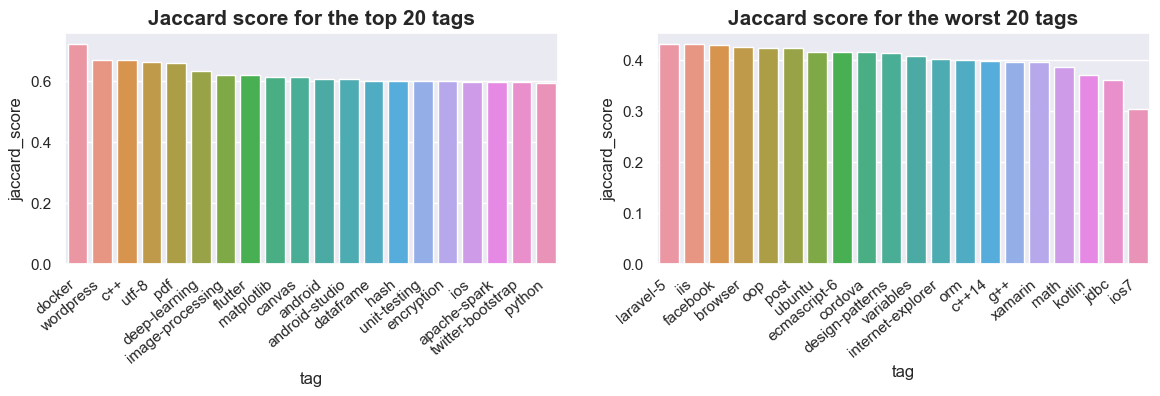

In [71]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

In [72]:
# Save the trained model to a file
joblib.dump(clf, 'data/BERT_bitri_KNN.pkl')

['data/BERT_bitri_KNN.pkl']

In [73]:
# Load the mlb
mlb_BERT = joblib.load('data/mlb.pkl')
# Load the saved KNeighborsClassifier model
BERT_KNN = joblib.load('data/BERT_bitri_KNN.pkl')

# Assuming you have an input text
question_title = "How to do feature extraction from a question in python using neural-network?"
question_body = "I would like to extract features using neural-network in python.\
I've applied many supervised and unsupervised machine-learning models, e.g, BERT with KNN and TF-IDF with NMF.\
The end goal is to compare the neural-network results with the other already applied machine-learning models."

# Preprocess the input text (lemmatization)
question_title_body_filt_lem = filter_tokenize_lem(question_title, question_body)

start = time.time()

# Vectorize the lemmatized text using the trained TfidfVectorizer
bert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_type)
input_ids, token_type_ids, attention_mask = bert_inp_fct([question_title_body_filt_lem],
                                                         bert_tokenizer,
                                                         max_length)
outputs = model.predict([input_ids, attention_mask, token_type_ids],
                        batch_size=batch_size)
last_hidden_states = outputs.last_hidden_state
last_hidden_states_mean = last_hidden_states.mean(axis=1)
x_input_BERT = last_hidden_states_mean
#x_input_W2V = W2V_KNN.encode([lemmatized_text])

# Make a prediction using the loaded OneVsRestClassifier model
y_input_mlb = BERT_KNN.predict(x_input_BERT)

# Convert the binary prediction back to tags using the trained MultiLabelBinarizer
y_input = mlb_BERT.inverse_transform(y_input_mlb)

stop = time.time()
print('BERT_KNN processing time: {}s\n'.format(np.around((stop - start), 2)))

# Print the predicted tags
print('Predicted tags:', y_input)

Text after filtering, tokenizing, and lemmatization:
feature extraction python neural-network extract feature neural-network python applied supervised unsupervised machine-learning model bert knn tf-idf nmf end goal compare neural-network result applied machine-learning model



loading configuration file config.json from cache at C:\Users\DJANGO/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\DJANGO/.cache\huggingface\hub\models--bert-base-uncased\snapshots\0a6aa9128b6194f4f3c4db429b6cb4891cdb421b\vocab

1/1 [==============================] - 1s 1s/step
BERT_KNN processing time: 2.45s

Predicted tags: [('machine-learning', 'deep-learning', 'neural-network')]


#### <font id='Sec.2.5.4'> d) Fit/predict using One vs the rest classifier (logistic regression, SGDClassifier, and MultinomialNB)

In [74]:
# Initialize LogisticRegression
clf = OneVsRestClassifier(LogisticRegression(random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(X_train, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(X_test)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 1744.28s

Accuracy score = 0.0752194994103001, jaccard score = 0.3463628238756007, and hamming loss = 0.009173979833081077
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.71      0.39      0.50      3359
                 java       0.75      0.46      0.57      3076
           javascript       0.69      0.40      0.50      3191
               python       0.78      0.54      0.64      2370
                  c++       0.81      0.57      0.67      1895
                  ios       0.74      0.48      0.58      1739
                 .net       0.55      0.14      0.22      1574
                 html       0.68      0.39      0.50      1512
              android       0.89      0.56      0.68      1368
               jquery       0.82      0.50      0.62      1313
                  php       0.84      0.46      0.59      1091
          objective-c       0.56      0.24      0.34       922
                  cs

In [75]:
# Initialize ovr SGDClassifier
clf = OneVsRestClassifier(SGDClassifier(fit_intercept=False, random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(X_train, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(X_test)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 343.09s

Accuracy score = 0.059144716725636655, jaccard score = 0.3164861165712955, and hamming loss = 0.009417795554339668
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.69      0.47      0.56      3359
                 java       0.80      0.43      0.56      3076
           javascript       0.63      0.54      0.58      3191
               python       0.79      0.58      0.67      2370
                  c++       0.86      0.57      0.69      1895
                  ios       0.77      0.48      0.59      1739
                 .net       0.80      0.03      0.05      1574
                 html       0.72      0.35      0.47      1512
              android       0.90      0.56      0.69      1368
               jquery       0.90      0.36      0.51      1313
                  php       0.92      0.39      0.54      1091
          objective-c       0.65      0.07      0.12       922
                  c

In [76]:
# train and evaluate the model
# 1. Declare the model
clf = OneVsRestClassifier(MultinomialNB(), n_jobs=-1)

start = time.time()

# 2. Train the model
clf.fit(xtrain_tfidf, ytrain_mlb)

# 3. Make predictions  on test set
ypred_mlb = clf.predict(xtest_tfidf)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# 4. score
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n',
      classification_report(ytest_mlb, ypred_mlb,
                            target_names=mlb.classes_,
                            zero_division=0))

Processing time: 8.42s

Accuracy score = 0.032455335692132964, jaccard score = 0.18155518530305584, and hamming loss = 0.010710488757415192
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.78      0.29      0.43      3359
                 java       0.81      0.41      0.54      3076
           javascript       0.70      0.38      0.49      3191
               python       0.84      0.45      0.59      2370
                  c++       0.78      0.57      0.66      1895
                  ios       0.75      0.44      0.56      1739
                 .net       0.64      0.03      0.07      1574
                 html       0.64      0.38      0.48      1512
              android       0.92      0.34      0.49      1368
               jquery       0.76      0.37      0.50      1313
                  php       0.92      0.20      0.33      1091
          objective-c       0.50      0.20      0.29       922
                  cs

### <font id='Sec.2.6'> F. Words Embedding using Universal Sentence Encoder (USE)

In [77]:
def feature_USE_fct(sentences, b_size, embed) :
    """Fonction qui génère des features par plongement de mots de type USE

    Arguments de cette fonction :
    sentences -- le corpus surlequel va être effectué le plongement de mots, sous forme d`une liste de longues chaînes de carctères (pas des tokens)
    b_size -- taille du batch"""
    batch_size = b_size
    time1 = time.time()
    for step in range(len(sentences)//batch_size):
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])
        if step == 0:
            features = feat
        else:
            features = np.concatenate((features, feat))

    ### Si le nombre de documents n'est pas divisible par la taille du batch, on reproduit la boucle précédente sur les documents restants
    if (len(sentences)//batch_size)*batch_size != len(sentences):
        feat = embed(sentences[idx+batch_size:])
        features = np.concatenate((features, feat))
  
    time2 = np.round(time.time() - time1, 0)
    return features

#### <font id='Sec.2.6.1'> a) Features creation

In [78]:
# Load the embedding USE model from the source
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

# Save the embed to a file
tf.saved_model.save(embed, 'data/embed_USE')

# Load the embedded USE model locally
embed_USE = hub.load('data/embed_USE')

INFO:tensorflow:Assets written to: data/embed_USE\assets


INFO:tensorflow:Assets written to: data/embed_USE\assets


In [79]:
batch_size = 50

In [80]:
features_USE_train = feature_USE_fct(xtrain, batch_size, embed_USE)
features_USE_test = feature_USE_fct(xtest, batch_size, embed_USE)

In [81]:
X_train = features_USE_train
X_test = features_USE_test

#### <font id='Sec.2.6.2'> b) Fit/predict using RandomForestClassifier

In [82]:
# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(X_train, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(X_test)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('USE_RFC', metrics_score_df, ytest_mlb, ypred_mlb)
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n', classification_report(ytest_mlb, ypred_mlb, target_names=mlb.classes_, zero_division=0))

Processing time: 418.73s

Accuracy score = 0.5532695583802909, jaccard score = 0.6308232085915221, and hamming loss = 0.004800959530592956
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.91      0.79      0.84      3359
                 java       0.94      0.80      0.87      3076
           javascript       0.93      0.77      0.84      3191
               python       0.96      0.81      0.88      2370
                  c++       0.95      0.80      0.87      1895
                  ios       0.91      0.78      0.84      1739
                 .net       0.97      0.57      0.72      1574
                 html       0.93      0.63      0.75      1512
              android       0.97      0.78      0.87      1368
               jquery       0.96      0.70      0.81      1313
                  php       0.97      0.76      0.85      1091
          objective-c       0.94      0.60      0.73       922
                  css

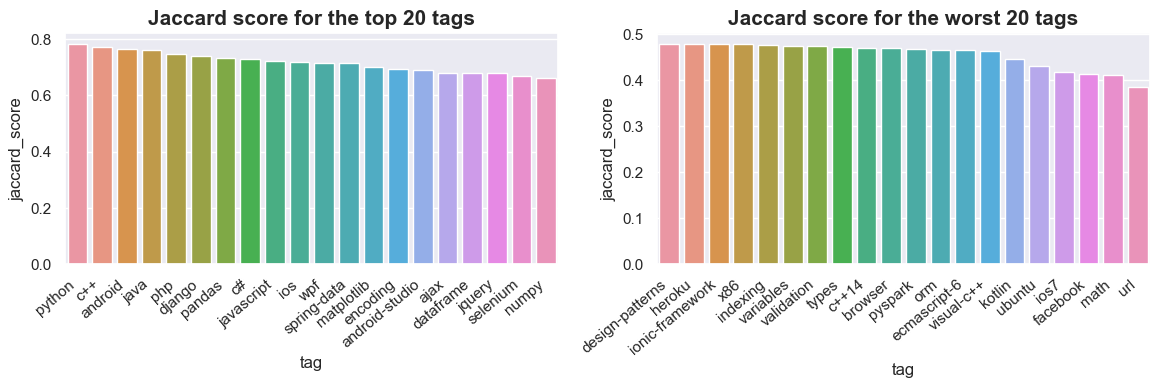

In [83]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

#### <font id='Sec.2.6.3'> c) Fit/predict using KNeighborsClassifier

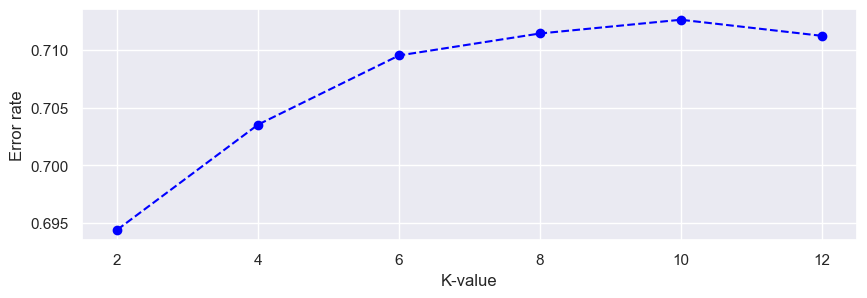

In [84]:
knn_score(X_train, ytrain_mlb, X_test, ytest_mlb, range(2, 13, 2))

In [85]:
# Initialize KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)

start = time.time()

# Train the classifier on the training data
clf.fit(X_train, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(X_test)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
metrics_score_df = metrics_score('USE_KNN', metrics_score_df, ytest_mlb, ypred_mlb)
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n', classification_report(ytest_mlb, ypred_mlb, target_names=mlb.classes_, zero_division=0))

Processing time: 22.25s

Accuracy score = 0.5771633250338531, jaccard score = 0.7126053295559258, and hamming loss = 0.004373368362047377
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.89      0.83      0.86      3359
                 java       0.89      0.83      0.86      3076
           javascript       0.87      0.81      0.84      3191
               python       0.92      0.88      0.90      2370
                  c++       0.89      0.87      0.88      1895
                  ios       0.87      0.83      0.85      1739
                 .net       0.85      0.65      0.74      1574
                 html       0.86      0.74      0.80      1512
              android       0.92      0.81      0.86      1368
               jquery       0.86      0.80      0.83      1313
                  php       0.94      0.79      0.86      1091
          objective-c       0.84      0.69      0.75       922
                  css 

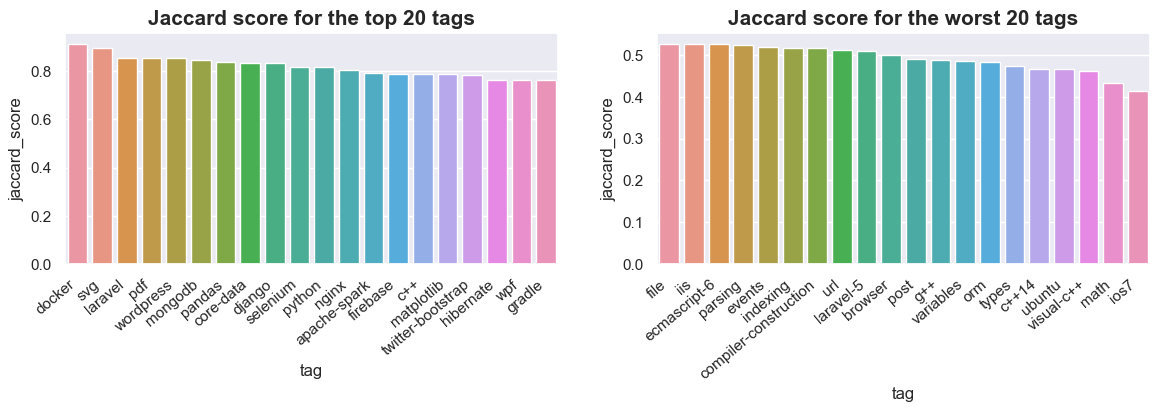

In [86]:
jaccard_score_tag(ytest_mlb, ypred_mlb, mlb.classes_)

In [87]:
# Save the trained model to a file
joblib.dump(clf, 'data/USE_bitri_KNN.pkl')

['data/USE_bitri_KNN.pkl']

In [88]:
# Load the mlb
mlb_USE = joblib.load('data/mlb.pkl')
# Load the embedded USE model
embed_USE = hub.load('data/embed_USE')
# Load the saved KNeighborsClassifier model
USE_KNN = joblib.load('data/USE_bitri_KNN.pkl')

# Assuming you have an input text
question_title = "How to do feature extraction from a question in python using neural-network?"
question_body = "I would like to extract features using neural-network in python.\
I've applied many supervised and unsupervised machine-learning models, e.g, USE with KNN and TF-IDF with NMF.\
The end goal is to compare the neural-network results with the other already applied machine-learning models."

# Preprocess the input text (lemmatization)
question_title_body_filt_lem = filter_tokenize_lem(question_title, question_body)

start = time.time()

# Vectorize the lemmatized text using the trained TfidfVectorizer
x_input_USE = embed_USE([question_title_body_filt_lem])

# Make a prediction using the loaded OneVsRestClassifier model
y_input_mlb = USE_KNN.predict(x_input_USE)

# Convert the binary prediction back to tags using the trained MultiLabelBinarizer
y_input = mlb_USE.inverse_transform(y_input_mlb)

stop = time.time()
print('USE_KNN processing time: {}s\n'.format(np.around((stop - start), 2)))

# Print the predicted tags
print('Predicted tags:', y_input)

Text after filtering, tokenizing, and lemmatization:
feature extraction python neural-network extract feature neural-network python applied supervised unsupervised machine-learning model knn tf-idf nmf end goal compare neural-network result applied machine-learning model

USE_KNN processing time: 0.48s

Predicted tags: [('python',)]


#### <font id='Sec.2.6.4'> d) Fit/predict using One vs the rest classifier (logistic regression, SGDClassifier, and MultinomialNB)

In [89]:
# Initialize LogisticRegression
clf = OneVsRestClassifier(LogisticRegression(random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(X_train, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(X_test)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n', classification_report(ytest_mlb, ypred_mlb, target_names=mlb.classes_, zero_division=0))

Processing time: 800.92s

Accuracy score = 0.09959376228541475, jaccard score = 0.4218511896961641, and hamming loss = 0.008320363764006569
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.76      0.67      0.72      3359
                 java       0.81      0.74      0.77      3076
           javascript       0.73      0.65      0.69      3191
               python       0.86      0.78      0.82      2370
                  c++       0.83      0.71      0.77      1895
                  ios       0.77      0.69      0.73      1739
                 .net       0.59      0.27      0.37      1574
                 html       0.69      0.50      0.58      1512
              android       0.90      0.73      0.80      1368
               jquery       0.80      0.58      0.67      1313
                  php       0.87      0.71      0.78      1091
          objective-c       0.58      0.39      0.46       922
                  cs

In [90]:
# Initialize ovr SGDClassifier
clf = OneVsRestClassifier(SGDClassifier(fit_intercept=False, random_state=42, n_jobs=-1))

start = time.time()

# Train the classifier on the training data
clf.fit(X_train, ytrain_mlb)

# Make predictions on the testing data
ypred_mlb = clf.predict(X_test)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# Evaluate the classifier using classification_report
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n', classification_report(ytest_mlb, ypred_mlb, target_names=mlb.classes_, zero_division=0))

Processing time: 151.85s

Accuracy score = 0.05735377626348666, jaccard score = 0.30874913937094517, and hamming loss = 0.009348183642488536
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.75      0.69      0.72      3359
                 java       0.82      0.71      0.76      3076
           javascript       0.72      0.66      0.69      3191
               python       0.86      0.77      0.81      2370
                  c++       0.85      0.67      0.75      1895
                  ios       0.77      0.67      0.72      1739
                 .net       0.00      0.00      0.00      1574
                 html       0.72      0.41      0.52      1512
              android       0.92      0.68      0.78      1368
               jquery       0.84      0.50      0.63      1313
                  php       0.86      0.72      0.78      1091
          objective-c       0.81      0.10      0.18       922
                  c

In [91]:
# train and evaluate the model
# 1. Declare the model
clf = OneVsRestClassifier(MultinomialNB(), n_jobs=-1)

start = time.time()

# 2. Train the model
clf.fit(xtrain_tfidf, ytrain_mlb)

# 3. Make predictions  on test set
ypred_mlb = clf.predict(xtest_tfidf)

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

# 4. score
print('Accuracy score = {}, jaccard score = {}, and hamming loss = {}'
      .format(accuracy_score(ytest_mlb, ypred_mlb),
              jaccard_score(ytest_mlb, ypred_mlb, average='samples'),
              hamming_loss(ytest_mlb, ypred_mlb)))
print('Classifier report:\n', classification_report(ytest_mlb, ypred_mlb, target_names=mlb.classes_, zero_division=0))

Processing time: 4.42s

Accuracy score = 0.032455335692132964, jaccard score = 0.18155518530305584, and hamming loss = 0.010710488757415192
Classifier report:
                        precision    recall  f1-score   support

                   c#       0.78      0.29      0.43      3359
                 java       0.81      0.41      0.54      3076
           javascript       0.70      0.38      0.49      3191
               python       0.84      0.45      0.59      2370
                  c++       0.78      0.57      0.66      1895
                  ios       0.75      0.44      0.56      1739
                 .net       0.64      0.03      0.07      1574
                 html       0.64      0.38      0.48      1512
              android       0.92      0.34      0.49      1368
               jquery       0.76      0.37      0.50      1313
                  php       0.92      0.20      0.33      1091
          objective-c       0.50      0.20      0.29       922
                  cs

### <font id='Sec.2.7'> G. Conclusion on the supervised learning

In [92]:
metrics_score_df

,CV_RFC,CV_KNN,tfidf_RFC,tfidf_KNN,W2V_RFC,W2V_KNN,BERT_RFC,BERT_KNN,USE_RFC,USE_KNN
Accuracy,0.568602,0.555366,0.568995,0.562530,0.545407,0.562617,0.539423,0.553619,0.553270,0.577163
Jaccard,0.680077,0.629228,0.681394,0.662624,0.574978,0.670102,0.541184,0.621887,0.630823,0.712605
hamming_loss,0.004269,0.006529,0.004252,0.005419,0.005347,0.005407,0.005677,0.006956,0.004801,0.004373
F1,0.721857,0.660510,0.723598,0.701457,0.589308,0.711855,0.543561,0.651514,0.664033,0.760840
Recall,0.688764,0.653840,0.689610,0.687100,0.576167,0.698987,0.541187,0.646042,0.634444,0.738840
Precision,0.813501,0.691227,0.817039,0.748953,0.629304,0.757697,0.550539,0.679170,0.752039,0.823896


- Random Forest classifier gave better scores than KNN Classifier in Count vectorizer and TF-IDF but lower score in W2V, BERT and USE. Since KNN is much ligher on memory and faster, we are gonna use KNN.
- We see from the metrics_score table that USE with KNN got the best metrics. However, since we are limited in Heroku to 500MB to deploy the app, we are gonna limit ourself to Count vectorizer and TF-IDF with modelisation using KNN. While TFIDF_KNN give better score than CV_KNN, we are going to vectorise the data using TF_IDF and perform the classification using KNN for the API later.

## <font id='Sec.3'> 3. Unsupervised learning for predicting the tags

### <font id='Sec.3.1'> A. Preparing the data for the modelisation
    - Creating dictionary words from title
    - Performing BOW and TFIDF on title_body using the generated dictionary

In [93]:
# Function that calcultae the perplexity and coherence score of LdaMulticore for different number of topics
def coherence_score(dictionary, corpus, texts, num_topic_range):

    perplexity_values = []
    coherence_values = []
    
    start = time.time()

    for num_topics in num_topic_range:

        # Define the model
        model = LdaMulticore(corpus=corpus,
                             id2word=dictionary,
                             num_topics=num_topics,
                             random_state=42,
                             chunksize=50,
                             passes=10,
                             per_word_topics=True,
                             workers=(multiprocessing.cpu_count()-1))

        # A measure of how good the model is, lower the better.
        perplexity = model.log_perplexity(corpus)
        perplexity_values.append(perplexity)
        
        # A way to judge the quality of topics, higher the better.
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    stop = time.time()
    print('Running time:', (stop-start))

    return perplexity_values, coherence_values

In [94]:
# A way to have a list of words for each sentence from title
texts = list(sample_data.str.split())

# A way to have a list of words for each sentence from title
X_title = list(SO_questions_df['Title_filt_lem_bitri'].str.split())

# Creating a dictionary of those list of words in title
dictionary = corpora.Dictionary(X_title)
# and selecting the words that appeared in at least 30 questions
dictionary.filter_extremes(no_below=30)

# Creating a bag of words using the title dictionary on the words in title_body_filt_lem
bow = [dictionary.doc2bow(list_tokens) for list_tokens in texts]

# Creating a TF-IDF using the title dictionary on the words in title_body_filt_lem
model_tfidf = TfidfModel(bow, dictionary)
bow_idf = model_tfidf[bow]

### <font id='Sec.3.2'> B. LDA (Latent Dirichlet Allocation)

LDA is a generative probabilistic model for discrete datasets such as text corpora. It is considered a three-level hierarchical Bayesian model, where each collection item is represented as a finite mixture over an underlying set of topics, and each topic is represented as an infinite mixture over a collection of topic probabilities.

We will be doing LdaMulticore fit on BOW on title and body using dictionary words from title

#### <font id='Sec.3.2.1'> a) Choosing the optimal number of topics
    Testing different number of topics for LdaMulticore and choosing the best one in terms of coherence score and perplexity

In [95]:
# Number of topics
num_topic_range = range(2, 50, 2)

# Generate the perplexity and coherence score
perplexity_values, coherence_values = coherence_score(dictionary=dictionary, corpus=bow,
                                                      texts=texts, num_topic_range=num_topic_range)

Running time: 4222.278628110886


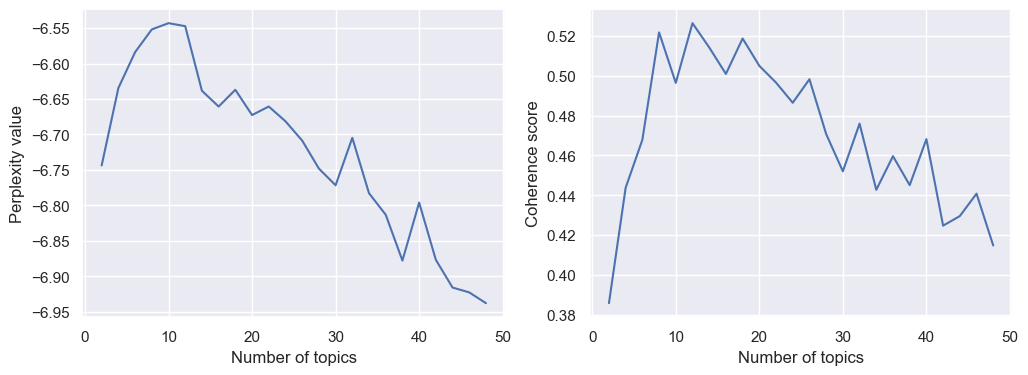

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(num_topic_range, perplexity_values)
axes[0].set_xlabel('Number of topics')
axes[0].set_ylabel('Perplexity value')
axes[1].plot(num_topic_range, coherence_values)
axes[1].set_xlabel('Number of topics')
axes[1].set_ylabel('Coherence score')
plt.show()

Number of topics of 12 seems to give the best coherence score.

#### <font id='Sec.3.2.2'> b) Generating topics
    Checking the topics words and Visulatisation using pyLDAvis

In [97]:
start = time.time()

# Initialise and fit the model
lda_model = LdaMulticore(corpus=bow,
                         id2word=dictionary,
                         num_topics=12,
                         random_state=42,
                         chunksize=50,
                         passes=10,
                         per_word_topics=True,
                         workers=(multiprocessing.cpu_count()-1))

stop = time.time()
print('Running time:', (stop-start))

# List of top words and their probability associated to each topic
lda_model.print_topics()

Running time: 84.42542147636414


[(0,
  '0.030*"page" + 0.029*"view" + 0.021*"button" + 0.019*"html" + 0.014*"event" + 0.014*"code" + 0.013*"click" + 0.013*"form" + 0.013*"change" + 0.012*"user"'),
 (1,
  '0.145*"file" + 0.023*"xml" + 0.019*"project" + 0.017*"application" + 0.016*"folder" + 0.014*"java" + 0.012*"directory" + 0.011*"build" + 0.010*"configuration" + 0.010*"path"'),
 (2,
  '0.032*"time" + 0.027*"thread" + 0.026*"memory" + 0.014*"process" + 0.013*"performance" + 0.012*"task" + 0.012*"code" + 0.012*"data" + 0.012*"second" + 0.011*"run"'),
 (3,
  '0.061*"app" + 0.043*"android" + 0.035*"io" + 0.020*"device" + 0.017*"code" + 0.016*"xcode" + 0.013*"gradle" + 0.012*"iphone" + 0.011*"firebase" + 0.011*"error"'),
 (4,
  '0.038*"project" + 0.033*"library" + 0.028*"window" + 0.024*"net" + 0.020*"studio" + 0.019*"visual" + 0.017*"build" + 0.016*"version" + 0.015*"application" + 0.013*"c#"'),
 (5,
  '0.071*"class" + 0.050*"method" + 0.044*"object" + 0.021*"property" + 0.019*"model" + 0.018*"spring" + 0.014*"exception

In [98]:
# Calculating the perplexity and coherence score
perplexity_value = lda_model.log_perplexity(bow)
coherence_value = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
print('Perplexity value = {}, and coherence score = {}.'.format(perplexity_value, coherence_value.get_coherence()))

Perplexity value = -6.549342156922495, and coherence score = 0.527968798182656.


In [99]:
# Function that generate a dataframe containing the top 20 words for each topic 
def get_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

get_topics(lda_model, len(lda_model.get_topics()))

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,Topic # 11,Topic # 12
0,page,file,time,app,project,class,error,data,function,test,user,image
1,view,xml,thread,android,library,method,run,table,code,request,server,array
2,button,project,memory,io,window,object,python,database,type,json,web,string
3,html,application,process,device,net,property,command,query,variable,code,client,way
4,event,folder,performance,code,studio,model,following,column,value,response,application,code
5,code,java,task,xcode,visual,spring,script,value,parameter,php,service,value
6,click,directory,code,gradle,build,exception,running,sql,c++,data,api,element
7,form,build,data,iphone,version,entity,module,row,compiler,post,net,line
8,change,configuration,second,firebase,application,code,line,key,c,header,connection,text
9,user,path,run,error,c#,way,code,date,following,url,asp,size


In [100]:
# Visualizing the model with pyLDAvis 
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow, dictionary, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.023709  0.312098       1        1  10.613736
10     0.152592  0.245735       2        1   9.697630
5      0.034957  0.039314       3        1   9.077182
2     -0.236356 -0.162576       4        1   9.008528
11    -0.195981 -0.003181       5        1   8.590976
7     -0.336354  0.044825       6        1   8.375553
8     -0.124838 -0.266340       7        1   8.276146
6      0.088587 -0.296159       8        1   8.177479
9     -0.176406  0.245135       9        1   7.741494
4      0.185703 -0.179883      10        1   7.345204
1      0.321224 -0.092172      11        1   7.130418
3      0.310582  0.113203      12        1   5.965653, topic_info=         Term          Freq         Total Category  logprob  loglift
36       file  52785.000000  52785.000000  Default  30.0000  30.0000
65      class  29504.000000  29504.000000  Default  29.0000  29.0000
98      error  41668.000000  41668.000000  Default  28.0000  28.0000
88       test  24719.000000  24719.000000  Default  27.0000  27.0000
292       app  25806.000000  25806.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
427   version   1875.628041  14498.590415  Topic12  -4.9771   0.7740
180       run   1909.905686  23802.083738  Topic12  -4.9589   0.2964
849       new   1861.008675  19478.784270  Topic12  -4.9849   0.4709
741      work   1794.686596  19761.317753  Topic12  -5.0212   0.4203
2340     fine   1641.331278  12382.309365  Topic12  -5.1105   0.7984

[827 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2169     12  0.997582       aar
1390      3  0.999061  abstract
375       1  0.003029    access
375       2  0.530139    access
375       3  0.145693    access
...     ...       ...       ...
1316     11  0.998558      yaml
1037     11  0.997664       yml
410       9  0.963689   youtube
410      12  0.034566   youtube
567      10  0.998656       zip

[2146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 11, 6, 3, 12, 8, 9, 7, 10, 5, 2, 4])

Observations:
- All topics are well distributed in the PC1, PC2 plan
- Topic 4 might be related to mobile application
- Topic 7 might be related to python
- Topic 8 might be related to sql database
- Topic 9 might be related to compiler, c++ and c
- Topic 11 might be related to api deployment
- All other topics are hard to interpret

#### <font id='Sec.3.2.3'> c) Generating words/question matrix

In [101]:
# Return topic distribution for the given document bow, as a list of (topic_id, topic_probability)
title_body_LDA_topics_df = pd.DataFrame(lda_model.get_document_topics(bow, minimum_probability=0))

# Just keeping the topic probability since the topic ids are already the columns
for topic in title_body_LDA_topics_df.columns:
    title_body_LDA_topics_df[topic] = title_body_LDA_topics_df[topic].apply(lambda x: x[1])
    
title_body_LDA_topics_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000765,0.154027,0.076683,0.091470,0.000765,0.000765,0.000765,0.622472,0.049994,0.000765,0.000766,0.000765
1,0.004388,0.508368,0.004388,0.004388,0.004388,0.004388,0.447755,0.004388,0.004388,0.004388,0.004388,0.004388
2,0.663786,0.001773,0.001774,0.147388,0.001773,0.032912,0.001774,0.001773,0.001773,0.001773,0.001773,0.141727
3,0.001413,0.001413,0.026157,0.001413,0.001413,0.001413,0.001413,0.001413,0.959717,0.001413,0.001413,0.001413
4,0.002526,0.002526,0.107979,0.002526,0.002526,0.658745,0.002526,0.002526,0.002526,0.002526,0.043739,0.169331
...,...,...,...,...,...,...,...,...,...,...,...,...
114457,0.652661,0.005209,0.005209,0.005209,0.005209,0.005209,0.005209,0.005209,0.005209,0.005209,0.005209,0.295250
114458,0.002033,0.002033,0.002033,0.002033,0.002033,0.002033,0.002033,0.002033,0.002033,0.668582,0.311089,0.002033
114459,0.027841,0.156206,0.001413,0.001413,0.202266,0.001413,0.211363,0.163795,0.001413,0.001413,0.230053,0.001413
114460,0.002193,0.089768,0.002193,0.002194,0.002193,0.002194,0.002194,0.002193,0.063756,0.437339,0.337336,0.056447


In [102]:
# Creating empty dataframe containing dictionary words in column and topics numbers in rows
LDA_topics_dictionary_words_df = pd.DataFrame(columns=[dictionary[i] for i in list(dictionary)],
                                              index=range(0, len(lda_model.get_topics())))

# Filling the dataframe with 0
LDA_topics_dictionary_words_df = LDA_topics_dictionary_words_df.fillna(0)

# Filling the Dataframe with the LDA model probability of each word in each topic
for topic in range(0, len(lda_model.get_topics())):
    for i in range(0, len(dictionary)):
        word, prob = lda_model.show_topic(topic, topn=len(dictionary))[i]
        LDA_topics_dictionary_words_df.loc[topic, word] = prob

LDA_topics_dictionary_words_df

,cursor,turn,wait,increase,jupyter_notebook,limit,memory,io,notification,push,...,highcharts,independent,ctypes,expo,kendo,aes,wrapped,swashbuckle,transpose,resteasy
0,1.064156e-03,0.000620,2.068340e-05,8.020135e-05,7.457653e-04,2.197806e-07,1.693072e-07,4.587069e-05,1.693087e-07,1.892820e-04,...,1.693118e-07,1.695128e-07,1.693059e-07,1.693065e-07,1.979813e-07,1.693064e-07,2.054039e-04,1.700328e-07,1.693060e-07,1.693060e-07
1,2.554596e-07,0.000074,2.554632e-07,2.554648e-07,2.554676e-07,3.370373e-07,2.554615e-07,2.554630e-07,2.554593e-07,8.622006e-04,...,2.554588e-07,2.554755e-07,2.554603e-07,2.554615e-07,2.563829e-07,2.554598e-07,2.554666e-07,2.563441e-07,2.554611e-07,3.736839e-04
2,2.033843e-07,0.000443,4.650744e-03,2.446367e-03,2.033843e-07,2.724967e-03,2.592533e-02,2.033974e-07,2.033829e-07,6.677986e-04,...,2.033795e-07,2.034124e-07,1.726729e-05,2.033792e-07,2.047150e-07,2.033834e-07,2.883416e-04,2.034241e-07,2.033875e-07,2.033795e-07
3,3.082838e-07,0.000501,3.094025e-07,3.082831e-07,3.082806e-07,3.082861e-07,3.082839e-07,3.521502e-02,1.012553e-02,5.898674e-03,...,3.082796e-07,3.082927e-07,3.082821e-07,6.521754e-04,3.091182e-07,3.082837e-07,3.082992e-07,3.139702e-07,3.082802e-07,3.082798e-07
4,2.470648e-07,0.000592,2.470665e-07,2.470672e-07,2.470676e-07,2.471070e-07,2.483006e-07,2.471067e-07,2.470646e-07,1.464521e-05,...,2.470664e-07,4.910133e-04,2.470930e-07,2.470637e-07,2.515842e-07,2.470759e-07,1.800022e-04,2.476238e-07,2.470659e-07,2.470636e-07
5,2.025568e-07,0.000389,2.025574e-07,2.025585e-07,2.025577e-07,2.025618e-07,2.025580e-07,2.025568e-07,2.025573e-07,2.025589e-07,...,2.025556e-07,2.025808e-07,2.025588e-07,2.025555e-07,2.062956e-07,2.025558e-07,2.025793e-07,2.049631e-07,2.025554e-07,2.025625e-07
6,2.228359e-07,0.000348,2.228372e-07,2.228342e-07,2.228802e-07,2.228633e-07,2.228331e-07,2.228326e-07,2.228318e-07,2.229243e-07,...,2.228318e-07,2.101476e-04,2.228626e-07,2.233352e-07,2.236903e-07,2.228353e-07,2.228401e-07,2.229321e-07,2.228310e-07,2.228328e-07
7,4.672960e-04,0.000122,2.195533e-07,1.289221e-06,2.195564e-07,6.955059e-04,2.195530e-07,2.195529e-07,2.195527e-07,2.195575e-07,...,2.195537e-07,1.661597e-04,2.195521e-07,2.195509e-07,2.266275e-07,2.195538e-07,2.195650e-07,2.201046e-07,2.195558e-07,2.195522e-07
8,2.206519e-07,0.000569,2.206602e-07,2.206533e-07,2.206503e-07,1.454029e-06,3.815797e-04,2.206500e-07,2.206497e-07,4.155070e-06,...,2.206502e-07,3.220505e-04,2.206714e-07,2.206491e-07,2.214228e-07,4.252723e-06,2.206749e-07,2.222368e-07,2.206522e-07,2.206493e-07
9,2.334406e-07,0.000307,3.561687e-04,2.334448e-07,2.334410e-07,3.079960e-07,2.334401e-07,2.371769e-07,5.782997e-06,1.435787e-04,...,2.334402e-07,2.334617e-07,2.334389e-07,2.334411e-07,2.345895e-07,2.334455e-07,1.441031e-04,2.350960e-07,2.334421e-07,2.334491e-07


In [103]:
# Multiplying the two matrices to get at the end a dataframe of probability of each word for a specific question
title_body_dictionary_words_df = pd.DataFrame(np.dot(title_body_LDA_topics_df, LDA_topics_dictionary_words_df),
                                             columns=[dictionary[i] for i in list(dictionary)])
title_body_dictionary_words_df

,cursor,turn,wait,increase,jupyter_notebook,limit,memory,io,notification,push,...,highcharts,independent,ctypes,expo,kendo,aes,wrapped,swashbuckle,transpose,resteasy
0,0.000292,0.000198,0.000357,0.000189,8.021412e-07,0.000642,0.002007,0.003221,0.000926,0.000724,...,4.591443e-07,0.000120,1.694410e-06,0.000060,2.367643e-07,6.391493e-07,0.000023,2.330604e-07,6.993909e-07,5.774987e-05
1,0.000007,0.000214,0.000022,0.000013,3.510802e-06,0.000016,0.000116,0.000155,0.000045,0.000469,...,1.542721e-06,0.000099,1.197406e-06,0.000003,2.404012e-07,1.434104e-06,0.000005,2.399034e-07,2.921101e-06,1.900783e-04
2,0.000707,0.000655,0.000023,0.000108,4.951139e-04,0.000007,0.000047,0.005221,0.001493,0.000998,...,4.230016e-05,0.000002,2.875695e-05,0.000096,2.176115e-07,6.809253e-07,0.000163,1.994655e-07,8.682432e-05,8.602564e-07
3,0.000002,0.000564,0.000122,0.000065,1.273541e-06,0.000074,0.001044,0.000050,0.000015,0.000031,...,6.399173e-07,0.000310,9.509822e-07,0.000001,2.211233e-07,4.468899e-06,0.000009,2.218258e-07,1.083702e-06,7.477883e-07
4,0.000004,0.000502,0.000503,0.000325,2.087712e-06,0.000305,0.002801,0.000089,0.000026,0.000090,...,5.050720e-05,0.000008,3.613251e-05,0.000002,2.077330e-07,1.194890e-05,0.000065,2.065506e-07,1.037035e-04,1.147750e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114457,0.000697,0.000741,0.000040,0.000170,4.868074e-04,0.000019,0.000137,0.000213,0.000053,0.000163,...,8.789460e-05,0.000007,5.970667e-05,0.000004,2.051437e-07,1.604097e-06,0.000189,1.863587e-07,1.806491e-04,2.130800e-06
114458,0.000003,0.000268,0.000248,0.000006,1.734838e-06,0.000068,0.000054,0.000072,0.000025,0.000112,...,8.230451e-07,0.000036,6.630441e-07,0.000002,2.203932e-07,8.368554e-05,0.000119,2.222363e-07,1.461671e-06,9.782912e-07
114459,0.000106,0.000287,0.000008,0.000007,2.098130e-05,0.000163,0.000037,0.000051,0.000015,0.000153,...,6.424999e-07,0.000196,5.313263e-07,0.000001,2.263324e-07,6.194644e-05,0.000058,2.246906e-07,1.086286e-06,5.855470e-05
114460,0.000004,0.000303,0.000167,0.000026,1.853509e-06,0.000074,0.000081,0.000078,0.000025,0.000156,...,1.698668e-05,0.000059,1.161801e-05,0.000002,2.192948e-07,9.097452e-05,0.000097,2.210974e-07,3.471997e-05,3.373996e-05


#### <font id='Sec.3.2.4'> d) Comparing top 5 words/question with initial tags

In [104]:
# Creating a dataframe containing the initial true tags for each question
title_body_top_words_df = pd.DataFrame(sample_target)

# Selecting the top 5 words in terms of probability for each question
for i in title_body_dictionary_words_df.index:
    title_body_top_words_df.loc[i, 'LDA_tags'] = ' '.join(title_body_dictionary_words_df.T[i].sort_values(ascending=False).index[:5])
    
title_body_top_words_df

,Tags_30,LDA_tags
0,sql ruby-on-rails sqlite count group-by,data table database file query
1,java eclipse javadoc javafx-2 javafx,file error run following python
2,objective-c xcode ipad ios7 ios8,page view code button html
3,c++ gcc constructor c++14 constexpr,function code type variable value
4,c# .net entity-framework architecture entity-f...,class method object property model
...,...,...
114457,ios objective-c uiview uiimageview calayer,page view code button image
114458,java spring rest integration resttemplate,test request server json code
114459,.net mysql database deployment installation,file error project application server
114460,java json spring rest multipartform-data,test request server code file


In [105]:
# Creating a dataframe with the words and frequency of tags
LDA_tags_words_df = words_freq_fct(title_body_top_words_df['LDA_tags'], 29)
tags_30_words_df = words_freq_fct(title_body_top_words_df['Tags_30'], 29)

# Storing in a list those tags
LDA_tags_list = list(LDA_tags_words_df['Word'])
tags_30_list = list(tags_30_words_df['Word'])
tags_list = list(set(LDA_tags_list + tags_30_list))

Number of unique words = 60, while 0 words appeared only in 29 questions or less.
Number of unique words = 2594, while 136 words appeared only in 29 questions or less.


In [106]:
# Transforming the target
ytrue = title_body_top_words_df['Tags_30'].apply(lambda x: [(str(y)) for y in x.split()])
ypred = title_body_top_words_df['LDA_tags'].apply(lambda x: [(str(y)) for y in x.split()])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=tags_list)

# Fit and transform the _Tags column
ytrue_mlb = mlb.fit_transform(ytrue)
print('The number of questions (rows) and unique words (columns) in ytrue_mlb = {} and {} respectively'
      .format(ytrue_mlb.shape[0], ytrue_mlb.shape[1]))

ypred_mlb = mlb.transform(ypred)
print('The number of questions (rows) and unique words (columns) in ypred_mlb = {} and {} respectively'
      .format(ypred_mlb.shape[0], ypred_mlb.shape[1]))

The number of questions (rows) and unique words (columns) in ytrue_mlb = 114462 and 2620 respectively
The number of questions (rows) and unique words (columns) in ypred_mlb = 114462 and 2620 respectively


In [107]:
mlb.classes_

array(['numba', 'xml-namespaces', 'internet-explorer-6', ...,
       'android-volley', 'logback', 'http-status-codes'], dtype=object)

In [108]:
metrics_score('LDA_tags', None, ytrue_mlb, ypred_mlb)

,LDA_tags
Accuracy,0.000000
Jaccard,0.013916
hamming_loss,0.003722
F1,0.024880
Recall,0.024880
Precision,0.024880


#### <font id='Sec.3.2.5'> e) Dimension reduction using t-SNE and visualisation
    The dimension reduction is done on tags of the questions and we visualise in 2D the questions per topic

In [109]:
# Selecting the best topic in terms of probability for each question
for i in title_body_LDA_topics_df.index:
    title_body_top_words_df.loc[i, 'best_topic'] = title_body_LDA_topics_df.T[i].sort_values(ascending=False).index[:1]

title_body_top_words_df

,Tags_30,LDA_tags,best_topic
0,sql ruby-on-rails sqlite count group-by,data table database file query,7.0
1,java eclipse javadoc javafx-2 javafx,file error run following python,1.0
2,objective-c xcode ipad ios7 ios8,page view code button html,0.0
3,c++ gcc constructor c++14 constexpr,function code type variable value,8.0
4,c# .net entity-framework architecture entity-f...,class method object property model,5.0
...,...,...,...
114457,ios objective-c uiview uiimageview calayer,page view code button image,0.0
114458,java spring rest integration resttemplate,test request server json code,9.0
114459,.net mysql database deployment installation,file error project application server,10.0
114460,java json spring rest multipartform-data,test request server code file,9.0


In [110]:
start = time.time()

# Train the t-SNE on ytrue_mlb
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000,
            init='random', random_state=42, n_jobs=-1)
tsne_df = tsne.fit_transform(ytrue_mlb)
tsne_df = pd.DataFrame(tsne_df,
                       columns=['Dim_1_tsne', 'Dim_2_tsne'])

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop-start), 2)))

Processing time: 1150.61s



In [111]:
# Merging the TSNE results with the best topic
tsne_Y_df = pd.merge(title_body_top_words_df['best_topic'],
                     tsne_df,
                     left_index=True,
                     right_index=True,
                     how='inner')
tsne_Y_df.head()

,best_topic,Dim_1_tsne,Dim_2_tsne
0,7.0,-36.362164,-11.316242
1,1.0,49.399681,0.770453
2,0.0,61.423927,58.814453
3,8.0,10.102115,96.885117
4,5.0,-102.441154,-12.185946


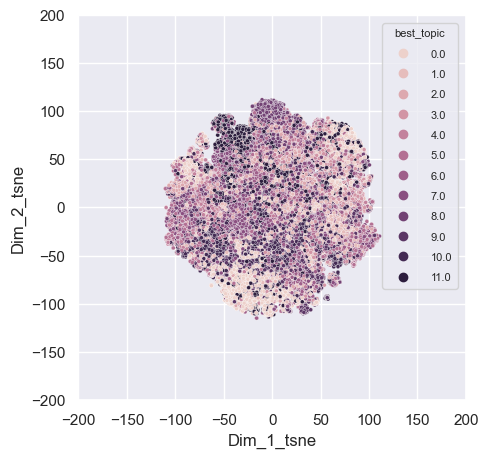

In [112]:
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(data=tsne_Y_df,
                x='Dim_1_tsne',
                y='Dim_2_tsne',
                hue='best_topic',
                legend='full',
                s=8)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='8')  # for legend text
plt.setp(plt.gca().get_legend().get_title(), fontsize='8')  # for legend titl
plt.show()

### <font id='Sec.3.3'> C. NMF (Non-Negative Matrix factorization)

NMF is a decompositional, non-probabilistic algorithm using matrix factorization and belongs to the group of linear-algebraic algorithms. NMF works on TF-IDF transformed data by breaking down a matrix into two lower-ranking matrices. Specifically, TF-IDF is a measure to evaluate the importance of a word in a collection of documents. NMF decomposes its input, which is a term-document matrix (A), into a product of a terms-topics matrix (W) and a topics-documents matrix (H). The values of W and H are modified iteratively, where the former contains the basis vectors, and the latter contains the corresponding weights.

We will be doing Nmf fit on TF-IDF on title and body using dictionary words from title

#### <font id='Sec.3.3.1'> a) Choosing the optimal number of topics
    Testing different number of topics for Nmf and choosing the best one in terms of coherence score

In [113]:
# Number of topics
num_topic_range = range(2, 50, 2)
coherence_values = []

start = time.time()

for num_topics in num_topic_range:
    # Train the model on the corpus.
    nmf_model = Nmf(corpus=bow_idf,
                    id2word=dictionary,
                    num_topics=num_topics,
                    random_state=42,
                    chunksize=50,
                    passes=10)

    # Generate the perplexity and coherence score
    coherencemodel = CoherenceModel(model=nmf_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

stop = time.time()
print('Running time:', (stop-start))

Running time: 5210.786269664764


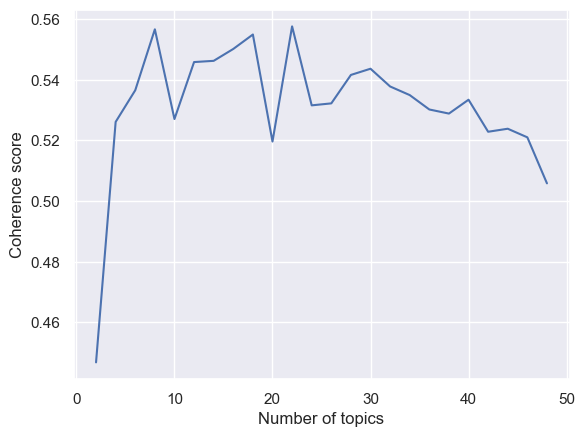

In [114]:
plt.plot(num_topic_range, coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

Number of topics of 8 seems to give the best coherence score.

#### <font id='Sec.3.3.2'> b) Generating topics
    Checking the topic words

In [115]:
start = time.time()

# Train the model on the corpus.
nmf_model = Nmf(corpus=bow_idf,
                id2word=dictionary,
                num_topics=8,
                random_state=42,
                chunksize=50,
                passes=10)

stop = time.time()
print('Running time:', (stop - start))

# List of top words and their probability associated to each topic
nmf_model.print_topics()

Running time: 142.36020350456238


[(0,
  '0.038*"class" + 0.030*"object" + 0.020*"method" + 0.018*"json" + 0.015*"property" + 0.014*"type" + 0.014*"spring" + 0.011*"entity" + 0.011*"model" + 0.010*"net"'),
 (1,
  '0.030*"image" + 0.018*"view" + 0.017*"button" + 0.011*"io" + 0.010*"text" + 0.009*"page" + 0.008*"app" + 0.007*"click" + 0.007*"html" + 0.007*"color"'),
 (2,
  '0.042*"file" + 0.030*"project" + 0.020*"studio" + 0.020*"android" + 0.019*"build" + 0.015*"library" + 0.014*"visual" + 0.014*"gradle" + 0.010*"folder" + 0.008*"window"'),
 (3,
  '0.052*"array" + 0.026*"test" + 0.022*"string" + 0.021*"function" + 0.018*"value" + 0.014*"list" + 0.013*"element" + 0.008*"return" + 0.008*"unit" + 0.008*"numpy"'),
 (4,
  '0.038*"table" + 0.028*"column" + 0.027*"query" + 0.024*"database" + 0.023*"sql" + 0.019*"row" + 0.018*"data" + 0.011*"mysql" + 0.010*"entity" + 0.009*"value"'),
 (5,
  '0.043*"thread" + 0.018*"memory" + 0.011*"task" + 0.010*"method" + 0.009*"function" + 0.009*"java" + 0.009*"time" + 0.008*"process" + 0.008

In [116]:
# Calculating the coherence score
coherence_value = CoherenceModel(model=nmf_model, texts=texts, dictionary=dictionary, coherence='c_v')
print('Coherence score = {}.'.format(coherence_value.get_coherence()))

Coherence score = 0.5565756378315007.


In [117]:
# Dataframe containing the top 20 words per topic
get_topics(nmf_model, len(nmf_model.get_topics()))

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08
0,class,image,file,array,table,thread,request,error
1,object,view,project,test,column,memory,server,python
2,method,button,studio,string,query,task,web,run
3,json,io,android,function,database,method,api,command
4,property,text,build,value,sql,function,client,install
5,type,page,library,list,row,java,page,following
6,spring,app,visual,element,data,time,user,test
7,entity,click,gradle,return,mysql,process,service,module
8,model,html,folder,unit,entity,program,token,package
9,net,color,window,numpy,value,variable,response,running


Observations:
- Topic 5 might be related to sql database
- Topic 7 might be related to api deployment
- Topic 8 might be related to python
- All other topics are hard to interpret

#### <font id='Sec.3.3.3'> c) Generating words/question matrix

In [118]:
# Return topic distribution for the given document bow_idf, as a list of (topic_id, topic_probability)
title_body_NMF_topics_df = pd.DataFrame(nmf_model.get_document_topics(bow_idf, minimum_probability=0))
title_body_NMF_topics_df_full = pd.DataFrame()

# Just keeping the topic probability since the topic ids are already the columns
for i in title_body_NMF_topics_df.index:
    for col in title_body_NMF_topics_df.columns:
        if title_body_NMF_topics_df.loc[i, col] != None:
            topic, prob = title_body_NMF_topics_df.loc[i, col]
            title_body_NMF_topics_df_full.loc[i, topic] = prob
    
title_body_NMF_topics_df_full = title_body_NMF_topics_df_full.fillna(0)
title_body_NMF_topics_df_full

,2,4,5,6,7,1,0,3
0,0.057992,0.651410,0.048386,0.074949,0.167263,0.000000,0.000000,0.000000
1,0.630671,0.000000,0.152864,0.000000,0.163067,0.053398,0.000000,0.000000
2,0.000000,0.000000,0.014654,0.000000,0.056169,0.913883,0.015293,0.000000
3,0.000000,0.101939,0.497604,0.000000,0.097249,0.000000,0.238347,0.064860
4,0.000000,0.192884,0.087528,0.000000,0.000000,0.000000,0.719588,0.000000
...,...,...,...,...,...,...,...,...
114457,0.000000,0.000000,0.000000,0.000000,0.040291,0.874518,0.085191,0.000000
114458,0.000000,0.000000,0.000000,0.990052,0.000000,0.000000,0.009948,0.000000
114459,0.181362,0.156009,0.023948,0.289126,0.290013,0.000000,0.059542,0.000000
114460,0.000000,0.014101,0.000000,0.716999,0.114037,0.038023,0.116840,0.000000


In [119]:
# Creating enpty dataframe containing dictionary words in column and topics numbers in rows
NMF_topics_dictionary_words_df = pd.DataFrame(columns=[dictionary[i] for i in list(dictionary)],
                                              index=range(0, len(nmf_model.get_topics())))

# Filling the dataframe with 0
NMF_topics_dictionary_words_df = NMF_topics_dictionary_words_df.fillna(0)

# Filling the Dataframe with the NMF model probability of each word in each topic
for topic in range(0, len(nmf_model.get_topics())):
    for i in range(0, len(dictionary)):
        word, prob = nmf_model.show_topic(topic, topn=len(dictionary))[i]
        NMF_topics_dictionary_words_df.loc[topic, word] = prob

NMF_topics_dictionary_words_df

,cursor,turn,wait,increase,jupyter_notebook,limit,memory,io,notification,push,...,highcharts,independent,ctypes,expo,kendo,aes,wrapped,swashbuckle,transpose,resteasy
0,0.000000,0.000607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000059,0.000000,0.000000,0.000077,0.000000,0.000197,0.000116,0.000000,0.000217
1,0.000762,0.000725,0.000272,0.000352,0.000057,0.000011,0.000018,0.010743,0.002441,0.001640,...,0.000152,0.000057,0.000000,0.000113,0.000125,0.000006,0.000161,0.000000,0.000000,0.000000
2,0.000000,0.000444,0.000000,0.000060,0.000000,0.000038,0.000000,0.000947,0.000000,0.000174,...,0.000000,0.000272,0.000000,0.000110,0.000000,0.000059,0.000072,0.000000,0.000000,0.000000
3,0.000040,0.000847,0.000000,0.000222,0.000000,0.000247,0.001089,0.000000,0.000000,0.000131,...,0.000091,0.000159,0.000209,0.000000,0.000004,0.000128,0.000281,0.000000,0.000316,0.000000
4,0.000641,0.000238,0.000000,0.000380,0.000036,0.001109,0.000000,0.000000,0.000000,0.000000,...,0.000033,0.000037,0.000000,0.000000,0.000132,0.000016,0.000000,0.000000,0.000077,0.000000
5,0.000072,0.000360,0.003684,0.001325,0.000000,0.001442,0.018293,0.000277,0.000198,0.000282,...,0.000000,0.000453,0.000039,0.000000,0.000000,0.000027,0.000191,0.000000,0.000044,0.000000
6,0.000000,0.000253,0.000581,0.000115,0.000000,0.000631,0.000000,0.000000,0.001058,0.000669,...,0.000013,0.000036,0.000000,0.000005,0.000035,0.000067,0.000063,0.000153,0.000000,0.000179
7,0.000036,0.000248,0.000028,0.000055,0.001165,0.000028,0.000000,0.001441,0.000653,0.000784,...,0.000000,0.000081,0.000228,0.000500,0.000000,0.000007,0.000033,0.000000,0.000000,0.000024


In [120]:
# Multiplying the two matrices to get at the end a dataframe of probability of each word for a specific question
title_body_dictionary_words_df = pd.DataFrame(np.dot(title_body_NMF_topics_df_full, NMF_topics_dictionary_words_df),
                                              columns=[dictionary[i] for i in list(dictionary)])
title_body_dictionary_words_df

,cursor,turn,wait,increase,jupyter_notebook,limit,memory,io,notification,push,...,highcharts,independent,ctypes,expo,kendo,aes,wrapped,swashbuckle,transpose,resteasy
0,0.000606,0.000632,0.000177,0.000312,0.000043,0.000213,0.000093,0.007044,0.001590,0.001087,...,0.000112,0.000072,0.000016,7.894056e-05,0.000108,0.000019,0.000141,0.000007,0.000037,0.000013
1,0.000108,0.000509,0.000197,0.000142,0.000006,0.000264,0.000977,0.000160,0.000011,0.000042,...,0.000005,0.000109,0.000002,1.680566e-05,0.000070,0.000013,0.000146,0.000073,0.000015,0.000137
2,0.000102,0.000352,0.003376,0.001235,0.000002,0.001391,0.016718,0.000267,0.000197,0.000270,...,0.000002,0.000420,0.000035,1.681029e-06,0.000008,0.000028,0.000177,0.000002,0.000045,0.000003
3,0.000142,0.000394,0.000168,0.000134,0.000085,0.000280,0.000002,0.001660,0.000543,0.000464,...,0.000022,0.000158,0.000015,9.972377e-05,0.000034,0.000048,0.000069,0.000037,0.000007,0.000044
4,0.000147,0.000361,0.000471,0.000156,0.000011,0.000459,0.000003,0.002155,0.001232,0.000813,...,0.000039,0.000061,0.000000,3.471321e-05,0.000050,0.000054,0.000083,0.000110,0.000000,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114457,0.000089,0.000346,0.003271,0.001184,0.000001,0.001360,0.015998,0.000242,0.000263,0.000303,...,0.000002,0.000400,0.000034,3.896325e-07,0.000008,0.000030,0.000173,0.000013,0.000042,0.000015
114458,0.000039,0.000841,0.000006,0.000221,0.000000,0.000251,0.001078,0.000000,0.000011,0.000136,...,0.000090,0.000157,0.000207,4.549744e-08,0.000004,0.000127,0.000279,0.000002,0.000313,0.000002
114459,0.000316,0.000563,0.000077,0.000237,0.000019,0.000433,0.000318,0.001699,0.000444,0.000338,...,0.000061,0.000085,0.000060,2.053696e-05,0.000075,0.000048,0.000148,0.000030,0.000114,0.000050
114460,0.000115,0.000688,0.000212,0.000271,0.000005,0.000432,0.001477,0.000162,0.000166,0.000206,...,0.000073,0.000140,0.000151,2.128048e-06,0.000024,0.000102,0.000218,0.000018,0.000237,0.000021


#### <font id='Sec.3.3.4'> d) Comparing top 5 words/question with initial tags

In [121]:
# Creating a dataframe containing the initial true tags for each question
title_body_top_words_df = pd.DataFrame(sample_target)

# Selecting the top 5 words in terms of probability for each question
for i in title_body_dictionary_words_df.index:
    title_body_top_words_df.loc[i, 'NMF_top5_tags'] = ' '.join(title_body_dictionary_words_df.T[i].sort_values(ascending=False).index[:5])
    
title_body_top_words_df

,Tags_30,NMF_top5_tags
0,sql ruby-on-rails sqlite count group-by,image view button io text
1,java eclipse javadoc javafx-2 javafx,class object method json type
2,objective-c xcode ipad ios7 ios8,thread memory task method function
3,c++ gcc constructor c++14 constexpr,file project android studio build
4,c# .net entity-framework architecture entity-f...,request server web api page
...,...,...
114457,ios objective-c uiview uiimageview calayer,thread memory task method function
114458,java spring rest integration resttemplate,array test string function value
114459,.net mysql database deployment installation,array table value column query
114460,java json spring rest multipartform-data,array test string function value


In [122]:
# Creating a dataframe with the words and frequency of tags
NMF_top5_tags_words_df = words_freq_fct(title_body_top_words_df['NMF_top5_tags'], 29)
tags_30_words_df = words_freq_fct(title_body_top_words_df['Tags_30'], 29)

# Storing in a list those tags
NMF_top5_tags_list = list(NMF_top5_tags_words_df['Word'])
tags_30_list = list(tags_30_words_df['Word'])
tags_list = list(set(NMF_top5_tags_list + tags_30_list))

Number of unique words = 52, while 3 words appeared only in 29 questions or less.
Number of unique words = 2594, while 136 words appeared only in 29 questions or less.


In [123]:
# Transforming the target
ytrue = title_body_top_words_df['Tags_30'].apply(lambda x: [(str(y)) for y in x.split()])
ypred = title_body_top_words_df['NMF_top5_tags'].apply(lambda x: [(str(y)) for y in x.split()])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=tags_list)

# Fit and transform the _Tags column
ytrue_mlb = mlb.fit_transform(ytrue)
print('The number of questions (rows) and unique words (columns) in ytrue_mlb = {} and {} respectively'
      .format(ytrue_mlb.shape[0], ytrue_mlb.shape[1]))

ypred_mlb = mlb.transform(ypred)
print('The number of questions (rows) and unique words (columns) in ypred_mlb = {} and {} respectively'
      .format(ypred_mlb.shape[0], ypred_mlb.shape[1]))

The number of questions (rows) and unique words (columns) in ytrue_mlb = 114462 and 2616 respectively
The number of questions (rows) and unique words (columns) in ypred_mlb = 114462 and 2616 respectively


In [124]:
mlb.classes_

array(['numba', 'xml-namespaces', 'internet-explorer-6', ...,
       'android-volley', 'logback', 'http-status-codes'], dtype=object)

In [125]:
metrics_score('NMF_top5_tags', None, ytrue_mlb, ypred_mlb)

,NMF_top5_tags
Accuracy,0.000000
Jaccard,0.003425
hamming_loss,0.003799
F1,0.006149
Recall,0.006149
Precision,0.006149


#### <font id='Sec.3.3.5'> e) Dimension reduction using t-SNE and visualisation

In [126]:
# Selecting the best topic in terms of probability for each question
for i in list(title_body_NMF_topics_df_full.index):
    title_body_top_words_df.loc[i, 'best_topic'] = title_body_NMF_topics_df_full.T[i].sort_values(ascending=False).index[:1]

title_body_top_words_df

,Tags_30,NMF_top5_tags,best_topic
0,sql ruby-on-rails sqlite count group-by,image view button io text,4.0
1,java eclipse javadoc javafx-2 javafx,class object method json type,2.0
2,objective-c xcode ipad ios7 ios8,thread memory task method function,1.0
3,c++ gcc constructor c++14 constexpr,file project android studio build,5.0
4,c# .net entity-framework architecture entity-f...,request server web api page,0.0
...,...,...,...
114457,ios objective-c uiview uiimageview calayer,thread memory task method function,1.0
114458,java spring rest integration resttemplate,array test string function value,6.0
114459,.net mysql database deployment installation,array table value column query,7.0
114460,java json spring rest multipartform-data,array test string function value,6.0


In [127]:
start = time.time()

# Train the t-SNE on ytrue_mlb
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000,
            init='random', random_state=42, n_jobs=-1)
tsne_df = tsne.fit_transform(ytrue_mlb)
tsne_df = pd.DataFrame(tsne_df,
                       columns=['Dim_1_tsne', 'Dim_2_tsne'])

stop = time.time()
print('Processing time: {}s\n'.format(np.around((stop - start), 2)))

Processing time: 1148.66s



In [128]:
# Merging the TSNE results with the best topic
tsne_Y_df = pd.merge(title_body_top_words_df['best_topic'],
                     tsne_df,
                     left_index=True,
                     right_index=True,
                     how='inner')
tsne_Y_df.head()

,best_topic,Dim_1_tsne,Dim_2_tsne
0,4.0,-36.362164,-11.316242
1,2.0,49.399681,0.770453
2,1.0,61.423927,58.814453
3,5.0,10.102115,96.885117
4,0.0,-102.441154,-12.185946


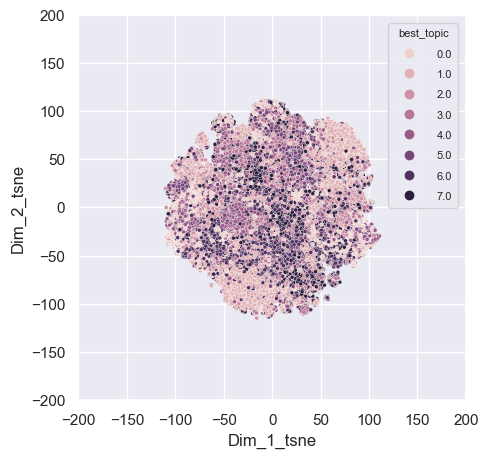

In [129]:
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(data=tsne_Y_df,
                x='Dim_1_tsne',
                y='Dim_2_tsne',
                hue='best_topic',
                legend='full',
                s=8)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.setp(plt.gca().get_legend().get_texts(), fontsize='8')  # for legend text
plt.setp(plt.gca().get_legend().get_title(), fontsize='8')  # for legend titl
plt.show()

### <font id='Sec.3.4'> D. Conclusion on the unsupervised learning

- Both tests using LDA and NMF gave not good result when comparing to the true tags
- LDA generated 12 topics while NMF generated 8 topics
- Supervised learning is better suited to predict the tags in comparaison to unsupervised learning